<a href="https://colab.research.google.com/github/GilianPonte/Deep-Learning/blob/master/Gilian_of_CelebA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
if not os.path.exists('data_faces/'):
  !mkdir data_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip 
  import zipfile

  with zipfile.ZipFile("celeba.zip","r") as zip_ref:
    zip_ref.extractall("data_faces/")



--2020-03-01 12:53:35--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.96
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip’

celeba.zip          100%[===================>]   1.34G  21.2MB/s    in 66s     

2020-03-01 12:54:41 (20.9 MB/s) - ‘celeba.zip’ saved [1443490838/1443490838]



Using TensorFlow backend.


Streaming output truncated to the last 5000 lines.
195103
195104
195105
195106
195107
195108
195109
195110
195111
195112
195113
195114
195115
195116
195117
195118
195119
195120
195121
195122
195123
195124
195125
195126
195127
195128
195129
195130
195131
195132
195133
195134
195135
195136
195137
195138
195139
195140
195141
195142
195143
195144
195145
195146
195147
195148
195149
195150
195151
195152
195153
195154
195155
195156
195157
195158
195159
195160
195161
195162
195163
195164
195165
195166
195167
195168
195169
195170
195171
195172
195173
195174
195175
195176
195177
195178
195179
195180
195181
195182
195183
195184
195185
195186
195187
195188
195189
195190
195191
195192
195193
195194
195195
195196
195197
195198
195199
195200
195201
195202
195203
195204
195205
195206
195207
195208
195209
195210
195211
195212
195213
195214
195215
195216
195217
195218
195219
195220
195221
195222
195223
195224
195225
195226
195227
195228
195229
195230
195231
195232
195233
195234
195235
195236
195237
1952

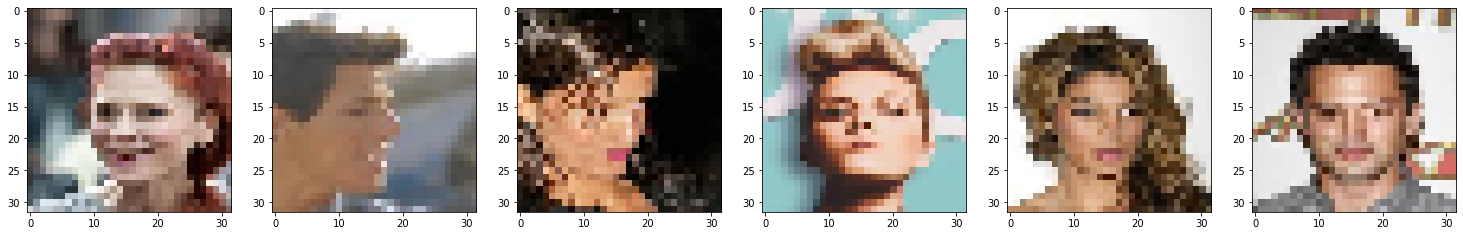

In [2]:
 
import matplotlib.pyplot as plt
import os, time  
import numpy as np 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

dir_data      = "/content/data_faces/img_align_celeba"
Ntrain        = 200000
Ntest         = 100
nm_imgs       = np.sort(os.listdir(dir_data))
## name of the jpg files for training set
nm_imgs_train = nm_imgs[:Ntrain]
## name of the jpg files for the testing data
nm_imgs_test  = nm_imgs[Ntrain:Ntrain + Ntest]
img_shape     = (32, 32, 3)

def get_npdata(nm_imgs_train):
    X_train = []
    for i, myid in enumerate(nm_imgs_train):
      print(i)
      image = load_img(dir_data + "/" + myid,
                         target_size=img_shape[:2])
      image = img_to_array(image)/255.0
      X_train.append(image)
    X_train = np.array(X_train)
    return(X_train)

X_train = get_npdata(nm_imgs_train)
print("X_train.shape = {}".format(X_train.shape))

X_test  = get_npdata(nm_imgs_test)
print("X_test.shape = {}".format(X_test.shape))

fig = plt.figure(figsize=(30,10))
nplot = 7
for count in range(1,nplot):
    ax = fig.add_subplot(1,nplot,count)
    ax.imshow(X_train[count])
plt.show()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              103424    
_________________________________________________________________
dense_8 (Dense)              (None, 8192)              8396800   
_________________________________________________________________
reshape_2 (Reshape)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 16, 16, 128)       65536     
_________________________________________________________________
block_4 (Conv2D)             (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 32, 32, 32)        8192

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 00000 [D loss: 0.709, acc.: 050.0%] [G loss: 0.665]


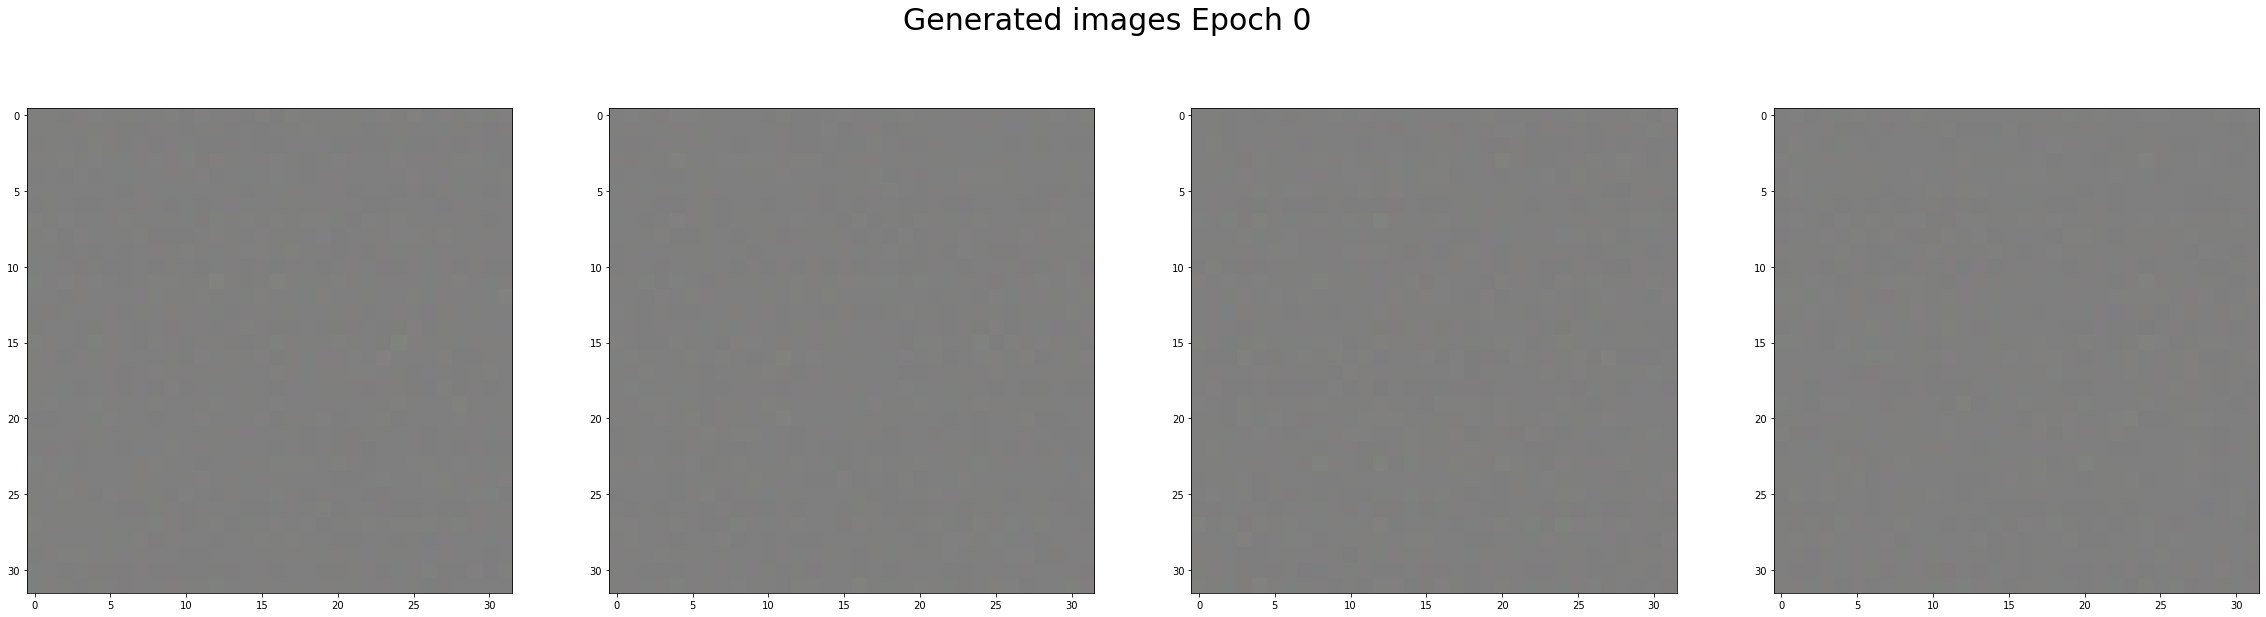

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 00100 [D loss: 0.096, acc.: 099.2%] [G loss: 2.641]
Epoch 00200 [D loss: 0.332, acc.: 087.4%] [G loss: 2.346]
Epoch 00300 [D loss: 0.279, acc.: 089.4%] [G loss: 2.301]
Epoch 00400 [D loss: 0.316, acc.: 088.6%] [G loss: 2.657]
Epoch 00500 [D loss: 0.201, acc.: 094.3%] [G loss: 3.003]
Epoch 00600 [D loss: 0.360, acc.: 091.3%] [G loss: 1.829]
Epoch 00700 [D loss: 0.128, acc.: 095.5%] [G loss: 2.755]
Epoch 00800 [D loss: 0.106, acc.: 095.5%] [G loss: 3.846]
Epoch 00900 [D loss: 0.185, acc.: 094.6%] [G loss: 2.849]
Epoch 01000 [D loss: 0.485, acc.: 072.9%] [G loss: 7.489]


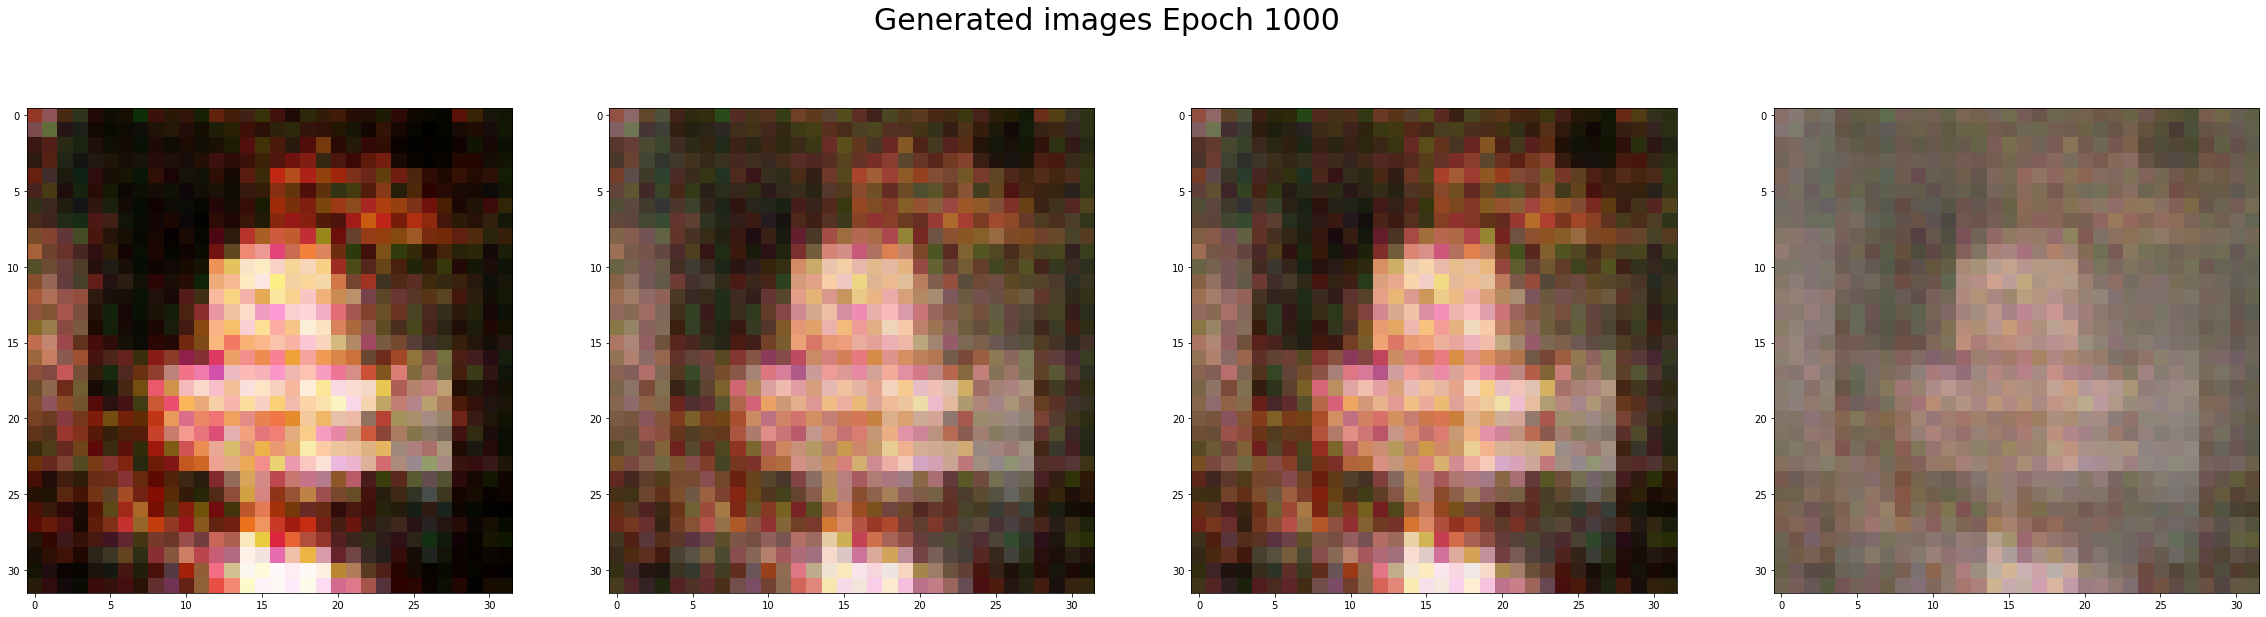

Epoch 01100 [D loss: 0.128, acc.: 097.1%] [G loss: 4.262]
Epoch 01200 [D loss: 0.395, acc.: 089.4%] [G loss: 1.518]
Epoch 01300 [D loss: 0.212, acc.: 094.1%] [G loss: 2.988]
Epoch 01400 [D loss: 0.145, acc.: 094.5%] [G loss: 3.480]
Epoch 01500 [D loss: 0.107, acc.: 096.8%] [G loss: 3.619]
Epoch 01600 [D loss: 0.085, acc.: 097.2%] [G loss: 4.470]
Epoch 01700 [D loss: 0.177, acc.: 095.1%] [G loss: 5.044]
Epoch 01800 [D loss: 0.359, acc.: 088.1%] [G loss: 1.772]
Epoch 01900 [D loss: 0.166, acc.: 094.1%] [G loss: 3.201]
Epoch 02000 [D loss: 0.142, acc.: 095.9%] [G loss: 3.554]


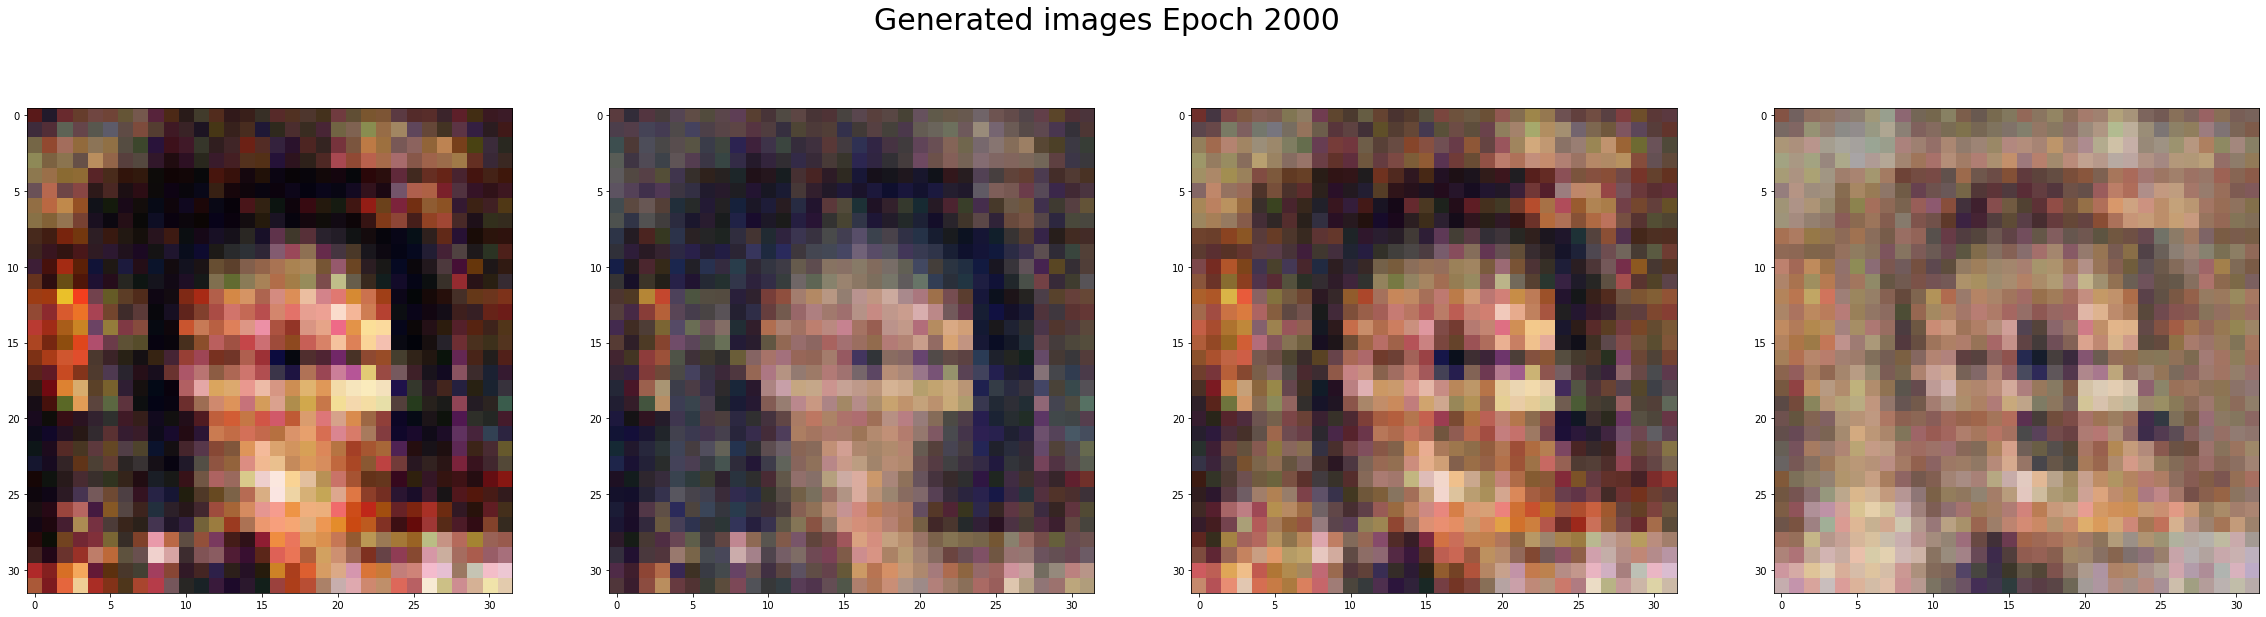

Epoch 02100 [D loss: 0.094, acc.: 096.6%] [G loss: 4.023]
Epoch 02200 [D loss: 0.134, acc.: 096.5%] [G loss: 3.348]
Epoch 02300 [D loss: 0.150, acc.: 095.3%] [G loss: 3.264]
Epoch 02400 [D loss: 0.294, acc.: 090.1%] [G loss: 2.610]
Epoch 02500 [D loss: 0.296, acc.: 089.6%] [G loss: 2.700]
Epoch 02600 [D loss: 0.240, acc.: 090.4%] [G loss: 3.028]
Epoch 02700 [D loss: 0.153, acc.: 094.6%] [G loss: 2.997]
Epoch 02800 [D loss: 0.299, acc.: 089.6%] [G loss: 2.345]
Epoch 02900 [D loss: 0.218, acc.: 091.7%] [G loss: 2.852]
Epoch 03000 [D loss: 0.399, acc.: 084.6%] [G loss: 1.840]


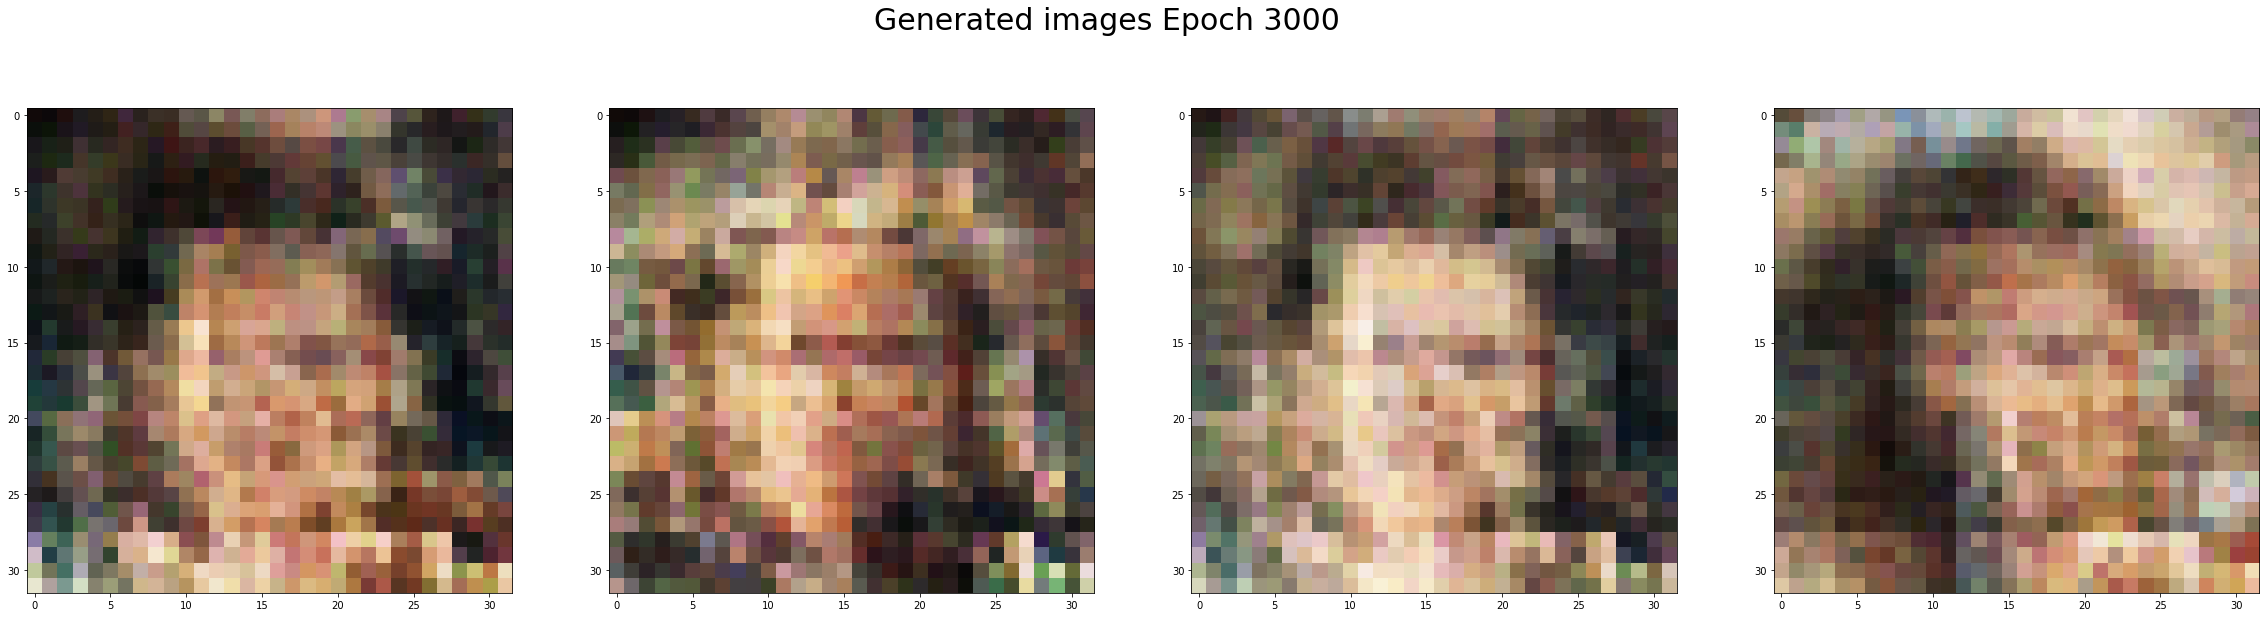

Epoch 03100 [D loss: 0.406, acc.: 083.4%] [G loss: 2.383]
Epoch 03200 [D loss: 0.335, acc.: 085.4%] [G loss: 2.360]
Epoch 03300 [D loss: 0.309, acc.: 088.3%] [G loss: 2.540]
Epoch 03400 [D loss: 0.239, acc.: 090.8%] [G loss: 2.711]
Epoch 03500 [D loss: 0.306, acc.: 088.8%] [G loss: 2.667]
Epoch 03600 [D loss: 0.266, acc.: 090.5%] [G loss: 2.673]
Epoch 03700 [D loss: 0.292, acc.: 087.9%] [G loss: 2.455]
Epoch 03800 [D loss: 0.359, acc.: 086.8%] [G loss: 2.331]
Epoch 03900 [D loss: 0.339, acc.: 086.1%] [G loss: 2.523]
Epoch 04000 [D loss: 0.358, acc.: 085.7%] [G loss: 2.350]


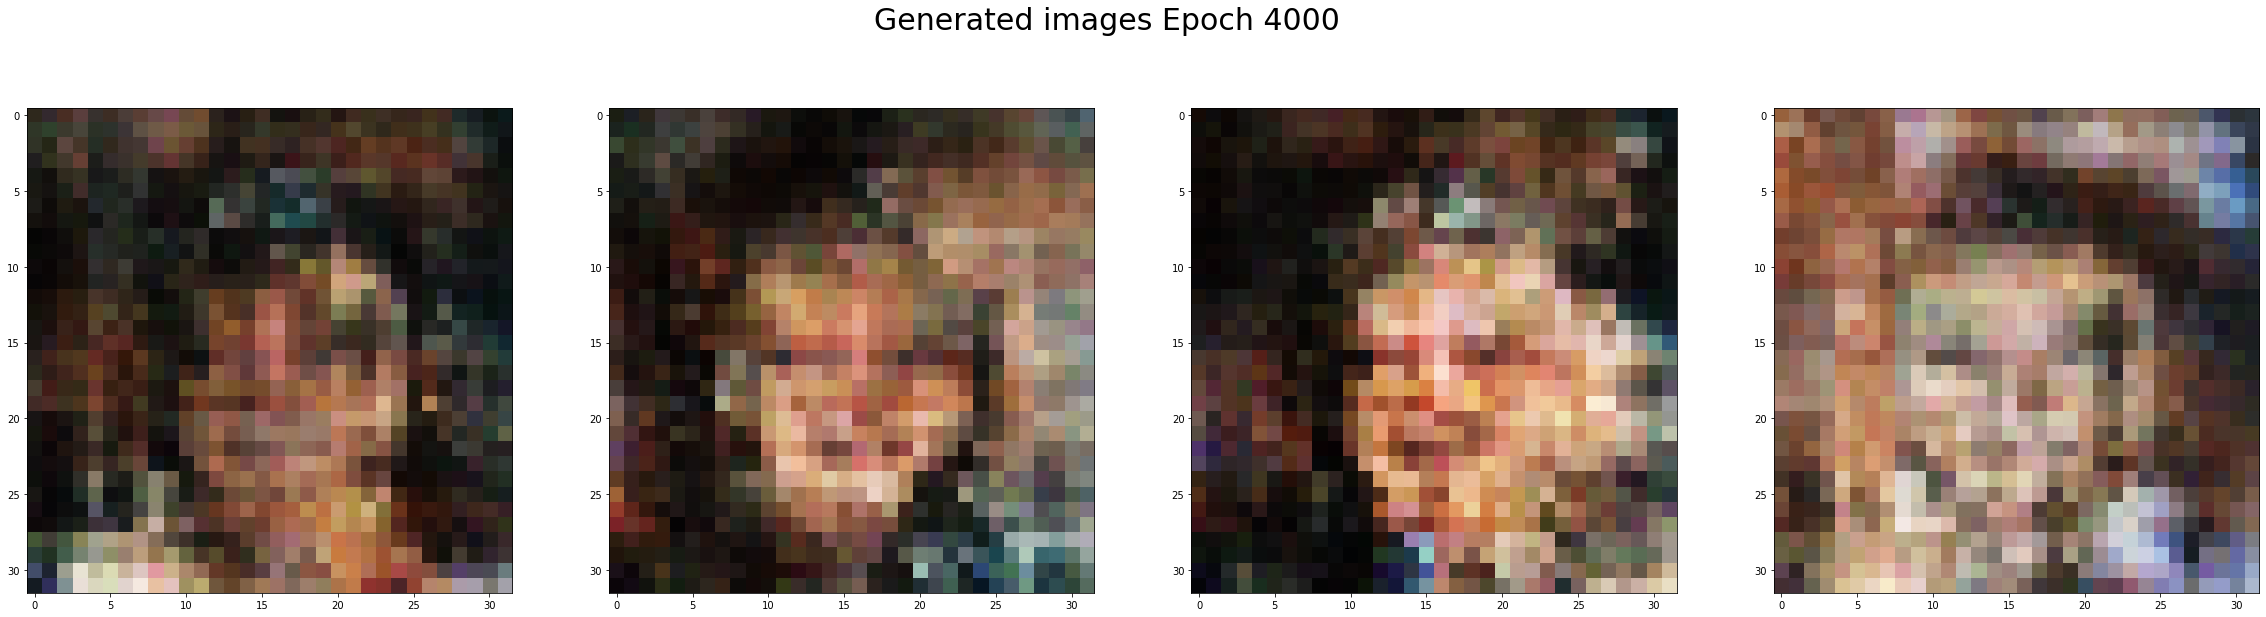

Epoch 04100 [D loss: 0.437, acc.: 081.3%] [G loss: 2.088]
Epoch 04200 [D loss: 0.360, acc.: 085.5%] [G loss: 2.247]
Epoch 04300 [D loss: 0.422, acc.: 081.0%] [G loss: 1.900]
Epoch 04400 [D loss: 0.461, acc.: 079.4%] [G loss: 1.978]
Epoch 04500 [D loss: 0.445, acc.: 080.5%] [G loss: 1.965]
Epoch 04600 [D loss: 0.383, acc.: 084.5%] [G loss: 1.941]
Epoch 04700 [D loss: 0.402, acc.: 081.8%] [G loss: 1.893]
Epoch 04800 [D loss: 0.468, acc.: 078.2%] [G loss: 1.970]
Epoch 04900 [D loss: 0.434, acc.: 080.2%] [G loss: 1.933]
Epoch 05000 [D loss: 0.497, acc.: 075.4%] [G loss: 1.777]


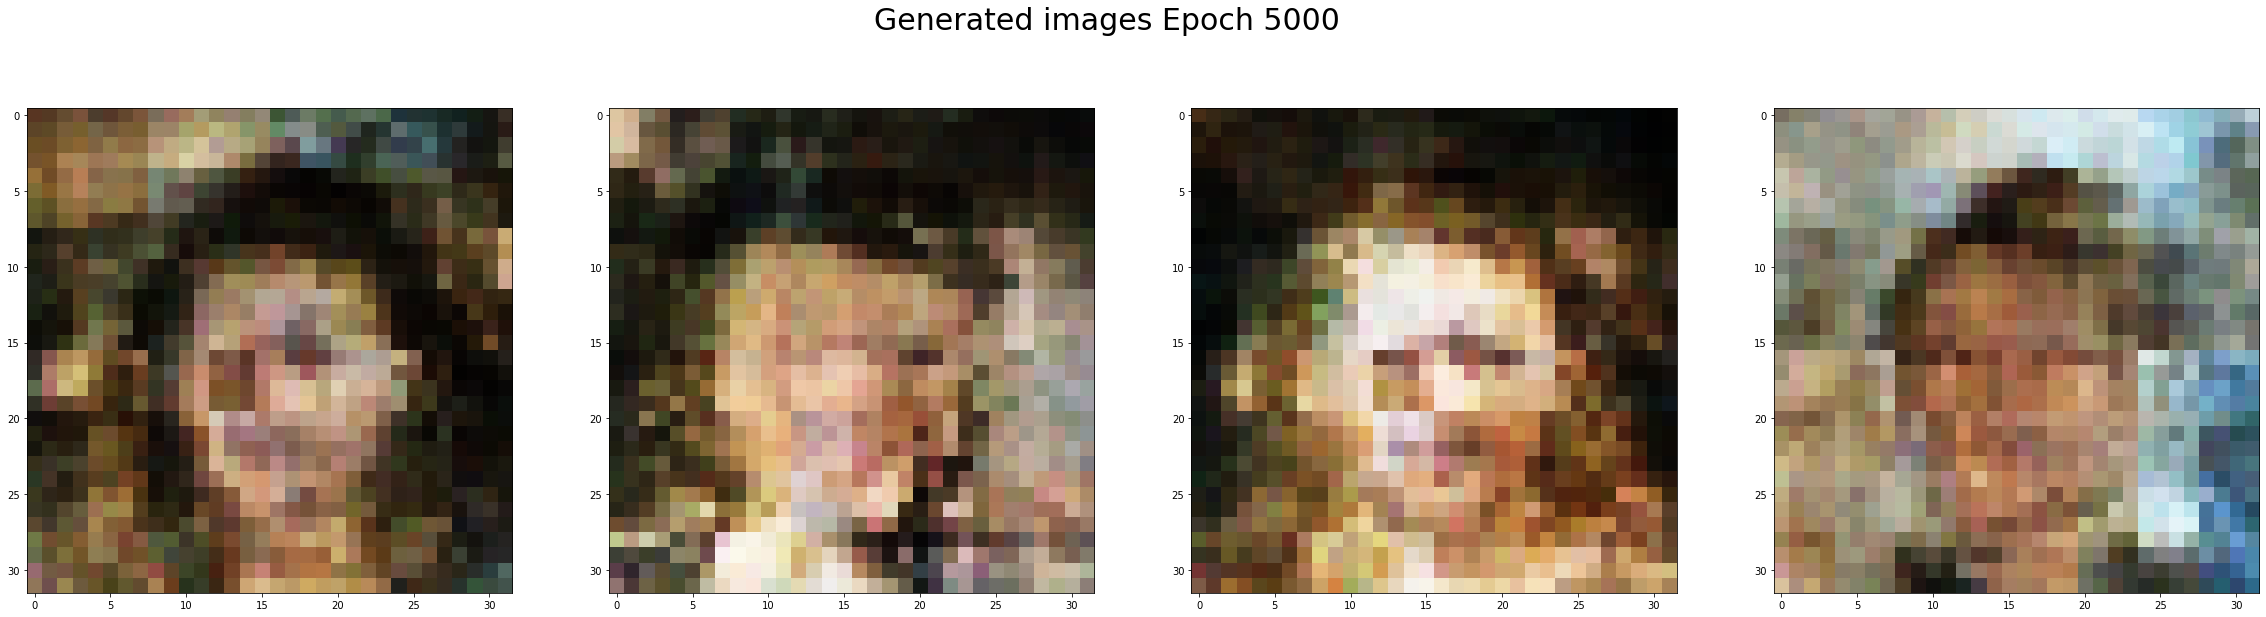

Epoch 05100 [D loss: 0.414, acc.: 080.4%] [G loss: 1.850]
Epoch 05200 [D loss: 0.454, acc.: 078.9%] [G loss: 1.886]
Epoch 05300 [D loss: 0.436, acc.: 080.4%] [G loss: 1.779]
Epoch 05400 [D loss: 0.480, acc.: 076.7%] [G loss: 1.688]
Epoch 05500 [D loss: 0.443, acc.: 079.0%] [G loss: 1.886]
Epoch 05600 [D loss: 0.429, acc.: 081.9%] [G loss: 1.794]
Epoch 05700 [D loss: 0.436, acc.: 079.5%] [G loss: 1.738]
Epoch 05800 [D loss: 0.454, acc.: 078.6%] [G loss: 1.685]
Epoch 05900 [D loss: 0.408, acc.: 082.6%] [G loss: 1.843]
Epoch 06000 [D loss: 0.428, acc.: 080.7%] [G loss: 1.827]


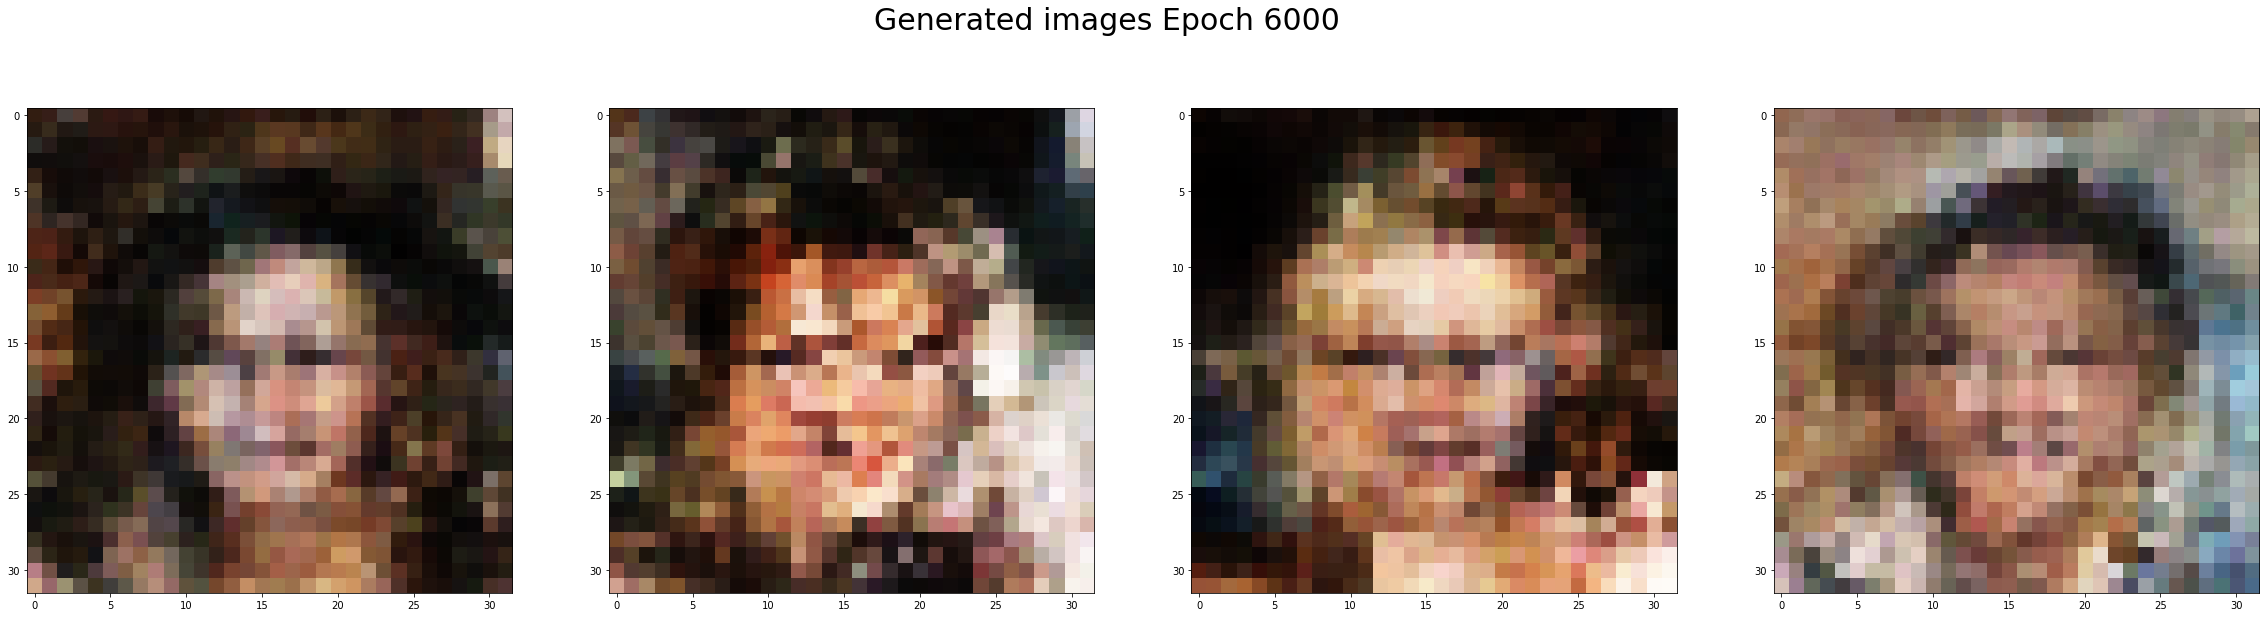

Epoch 06100 [D loss: 0.424, acc.: 080.5%] [G loss: 1.647]
Epoch 06200 [D loss: 0.437, acc.: 079.6%] [G loss: 1.764]
Epoch 06300 [D loss: 0.412, acc.: 081.5%] [G loss: 1.701]
Epoch 06400 [D loss: 0.412, acc.: 080.8%] [G loss: 1.661]
Epoch 06500 [D loss: 0.410, acc.: 080.7%] [G loss: 1.791]
Epoch 06600 [D loss: 0.417, acc.: 082.0%] [G loss: 1.799]
Epoch 06700 [D loss: 0.470, acc.: 077.6%] [G loss: 1.649]
Epoch 06800 [D loss: 0.430, acc.: 080.3%] [G loss: 1.737]
Epoch 06900 [D loss: 0.435, acc.: 080.7%] [G loss: 1.624]
Epoch 07000 [D loss: 0.438, acc.: 079.9%] [G loss: 1.732]


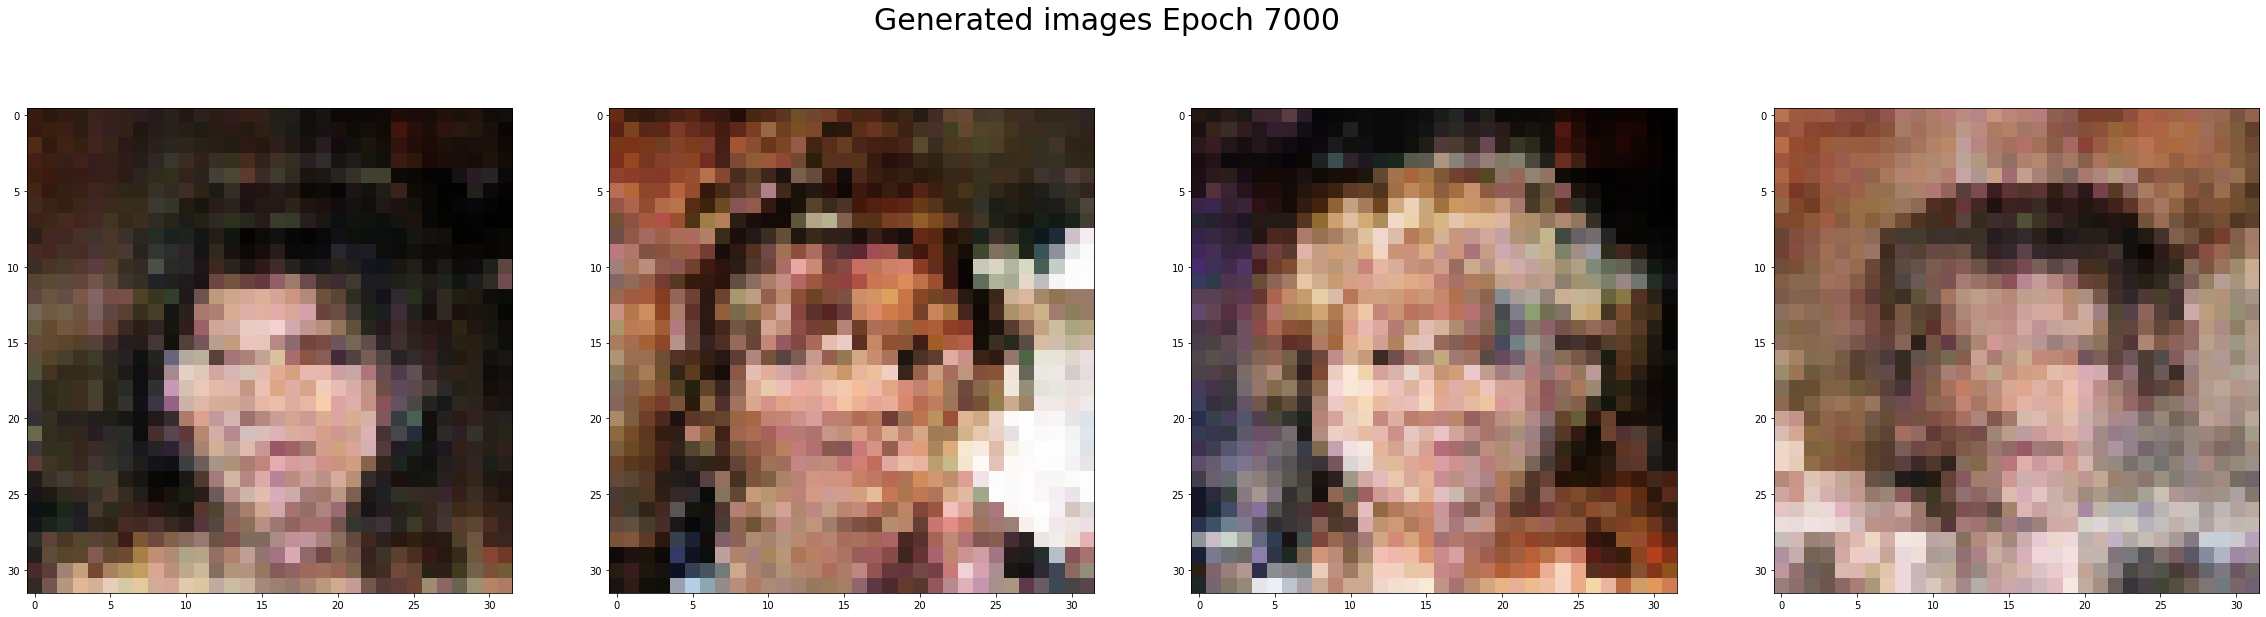

Epoch 07100 [D loss: 0.409, acc.: 080.9%] [G loss: 1.606]
Epoch 07200 [D loss: 0.435, acc.: 079.8%] [G loss: 1.588]
Epoch 07300 [D loss: 0.464, acc.: 078.0%] [G loss: 1.700]
Epoch 07400 [D loss: 0.428, acc.: 080.2%] [G loss: 1.580]
Epoch 07500 [D loss: 0.427, acc.: 080.3%] [G loss: 1.759]
Epoch 07600 [D loss: 0.428, acc.: 081.3%] [G loss: 1.656]
Epoch 07700 [D loss: 0.440, acc.: 079.7%] [G loss: 1.581]
Epoch 07800 [D loss: 0.429, acc.: 080.3%] [G loss: 1.593]
Epoch 07900 [D loss: 0.422, acc.: 081.3%] [G loss: 1.692]
Epoch 08000 [D loss: 0.420, acc.: 080.5%] [G loss: 1.787]


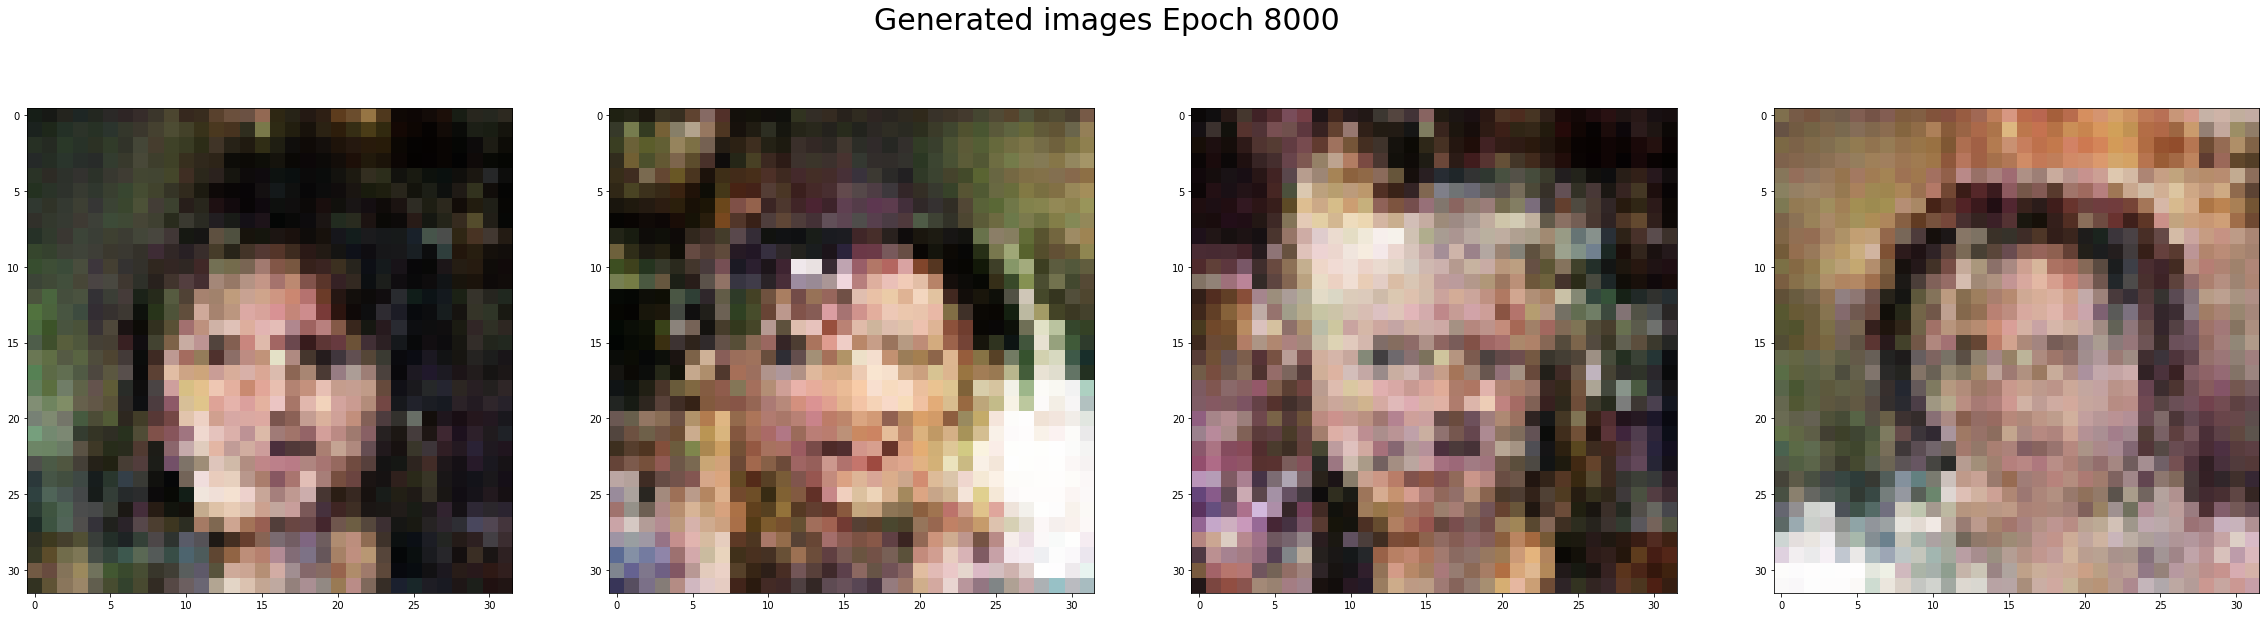

Epoch 08100 [D loss: 0.413, acc.: 081.8%] [G loss: 1.667]
Epoch 08200 [D loss: 0.397, acc.: 081.5%] [G loss: 1.738]
Epoch 08300 [D loss: 0.426, acc.: 080.2%] [G loss: 1.641]
Epoch 08400 [D loss: 0.441, acc.: 080.0%] [G loss: 1.624]
Epoch 08500 [D loss: 0.404, acc.: 082.8%] [G loss: 1.682]
Epoch 08600 [D loss: 0.444, acc.: 078.1%] [G loss: 1.585]
Epoch 08700 [D loss: 0.380, acc.: 083.2%] [G loss: 1.628]
Epoch 08800 [D loss: 0.419, acc.: 080.5%] [G loss: 1.659]
Epoch 08900 [D loss: 0.371, acc.: 083.4%] [G loss: 1.775]
Epoch 09000 [D loss: 0.414, acc.: 081.1%] [G loss: 1.784]


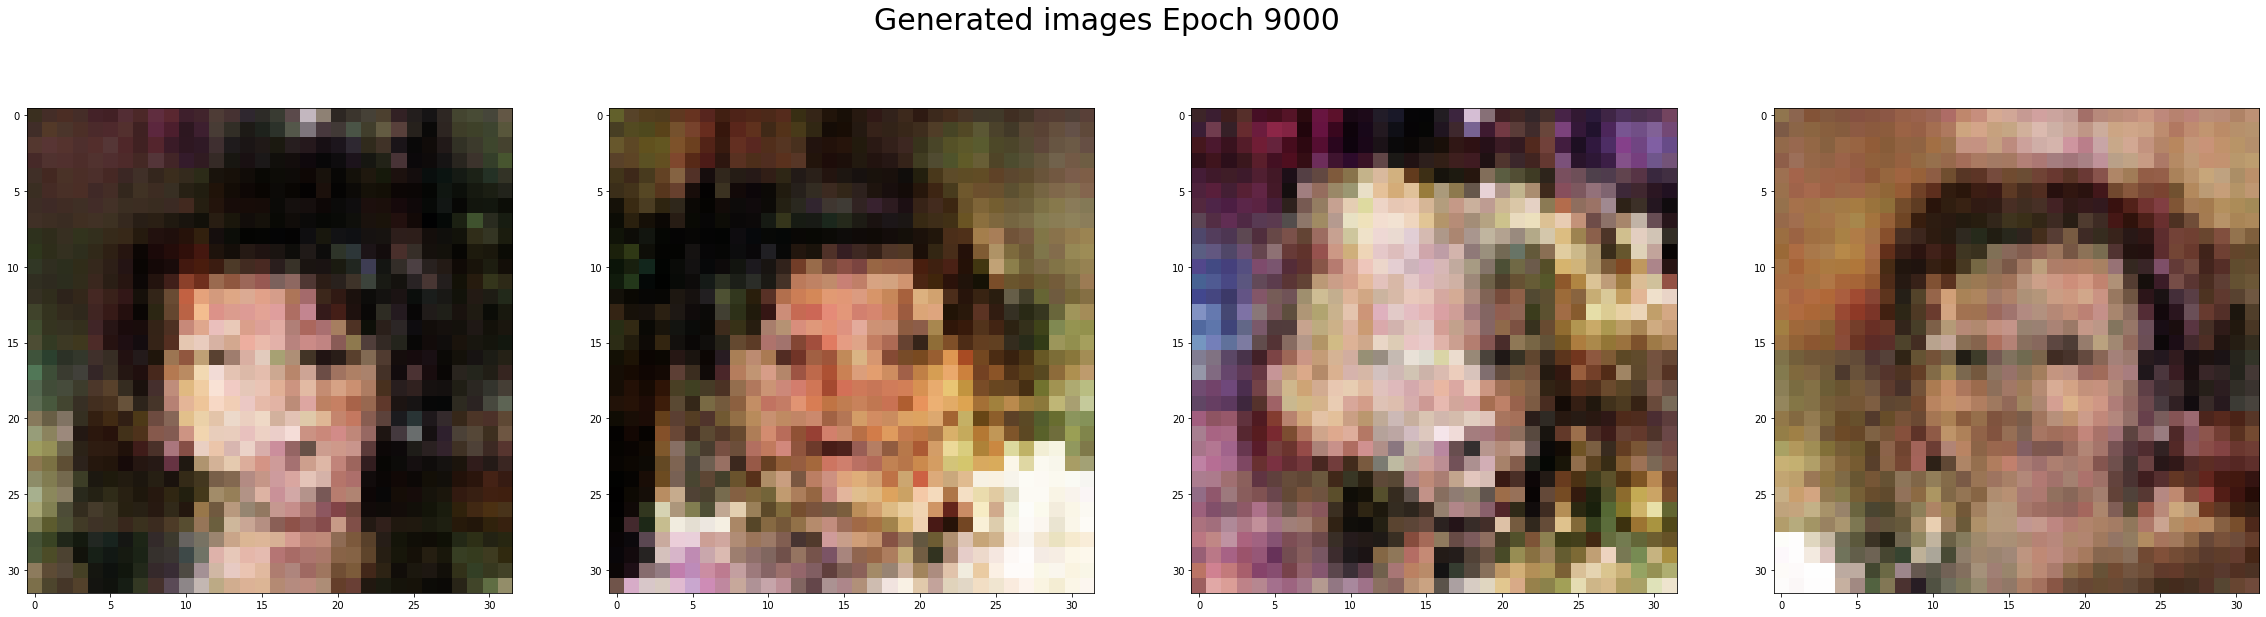

Epoch 09100 [D loss: 0.412, acc.: 081.2%] [G loss: 1.639]
Epoch 09200 [D loss: 0.413, acc.: 081.7%] [G loss: 1.768]
Epoch 09300 [D loss: 0.405, acc.: 082.4%] [G loss: 1.646]
Epoch 09400 [D loss: 0.404, acc.: 082.1%] [G loss: 1.729]
Epoch 09500 [D loss: 0.382, acc.: 084.0%] [G loss: 1.665]
Epoch 09600 [D loss: 0.411, acc.: 081.7%] [G loss: 1.566]
Epoch 09700 [D loss: 0.413, acc.: 081.2%] [G loss: 1.645]
Epoch 09800 [D loss: 0.387, acc.: 082.3%] [G loss: 1.736]
Epoch 09900 [D loss: 0.394, acc.: 082.1%] [G loss: 1.717]
Epoch 10000 [D loss: 0.410, acc.: 081.2%] [G loss: 1.617]


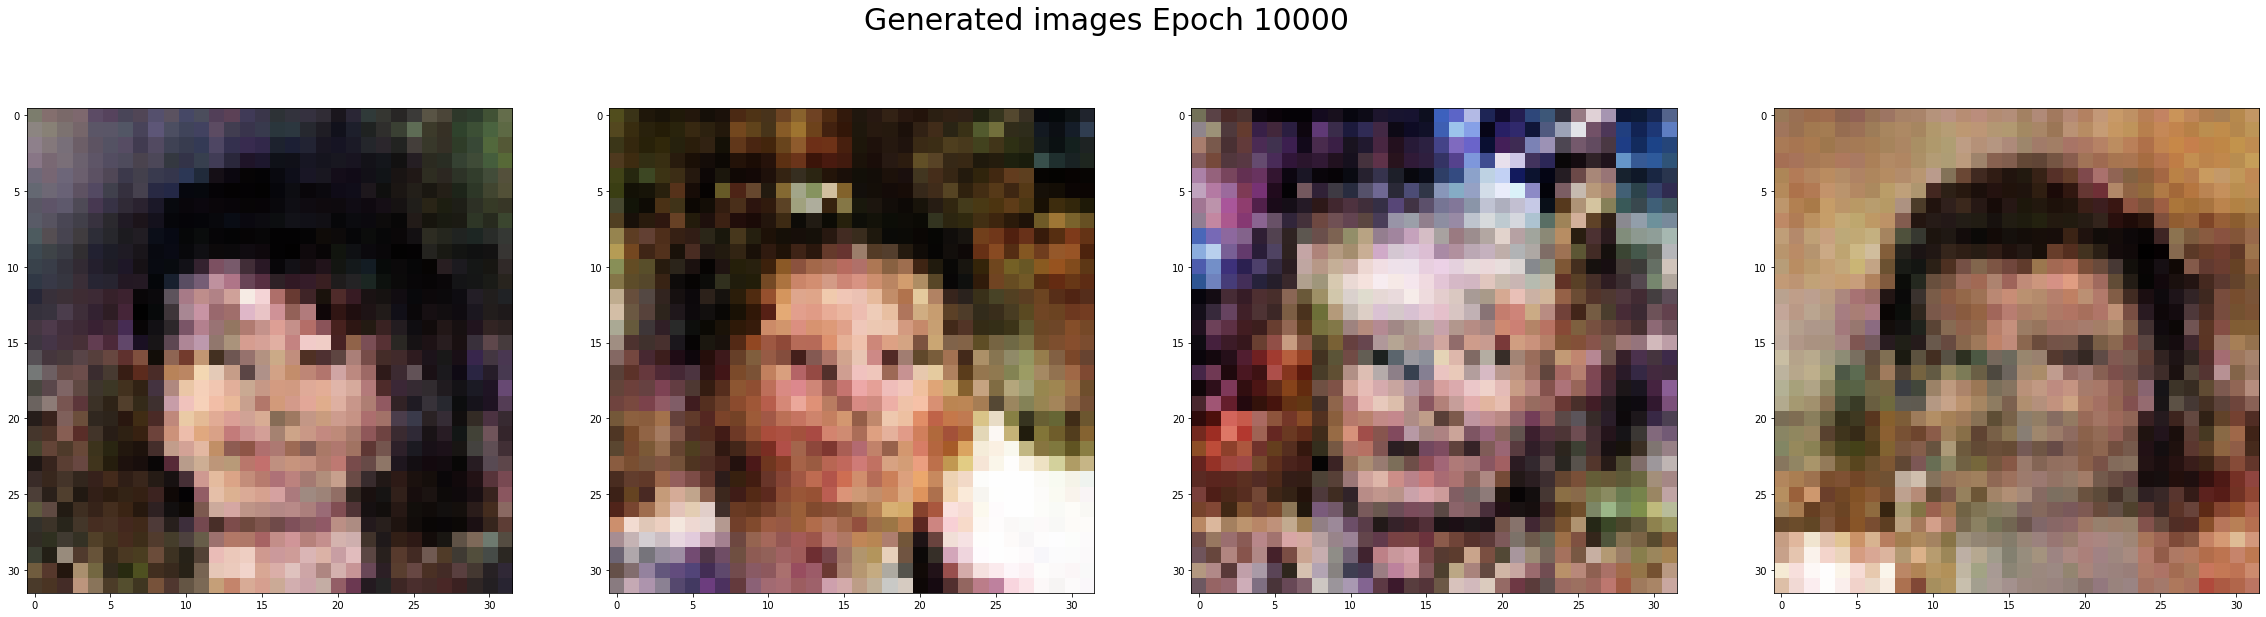

Epoch 10100 [D loss: 0.427, acc.: 080.3%] [G loss: 1.638]
Epoch 10200 [D loss: 0.416, acc.: 080.7%] [G loss: 1.609]
Epoch 10300 [D loss: 0.401, acc.: 083.3%] [G loss: 1.676]
Epoch 10400 [D loss: 0.444, acc.: 078.3%] [G loss: 1.618]
Epoch 10500 [D loss: 0.425, acc.: 080.8%] [G loss: 1.669]
Epoch 10600 [D loss: 0.416, acc.: 081.1%] [G loss: 1.644]
Epoch 10700 [D loss: 0.380, acc.: 084.5%] [G loss: 1.762]
Epoch 10800 [D loss: 0.395, acc.: 082.5%] [G loss: 1.691]
Epoch 10900 [D loss: 0.390, acc.: 082.6%] [G loss: 1.670]
Epoch 11000 [D loss: 0.372, acc.: 085.0%] [G loss: 1.616]


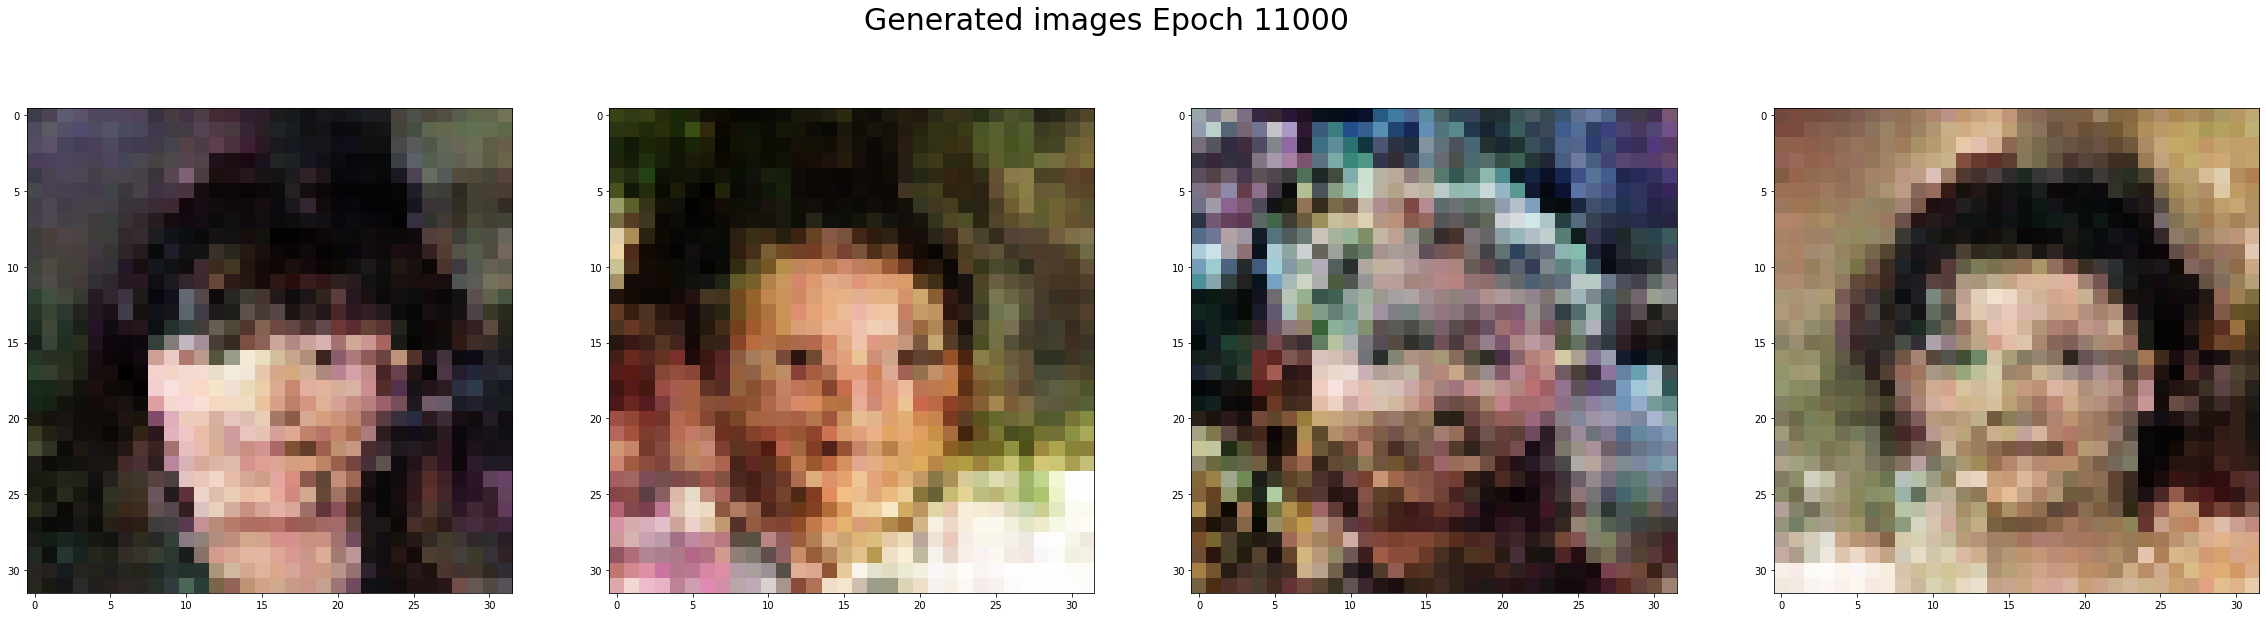

Epoch 11100 [D loss: 0.419, acc.: 081.2%] [G loss: 1.693]
Epoch 11200 [D loss: 0.413, acc.: 081.4%] [G loss: 1.687]
Epoch 11300 [D loss: 0.401, acc.: 081.6%] [G loss: 1.603]
Epoch 11400 [D loss: 0.413, acc.: 081.5%] [G loss: 1.654]
Epoch 11500 [D loss: 0.384, acc.: 082.5%] [G loss: 1.721]
Epoch 11600 [D loss: 0.379, acc.: 084.0%] [G loss: 1.709]
Epoch 11700 [D loss: 0.400, acc.: 081.9%] [G loss: 1.675]
Epoch 11800 [D loss: 0.423, acc.: 081.1%] [G loss: 1.748]
Epoch 11900 [D loss: 0.387, acc.: 082.6%] [G loss: 1.653]
Epoch 12000 [D loss: 0.385, acc.: 082.9%] [G loss: 1.643]


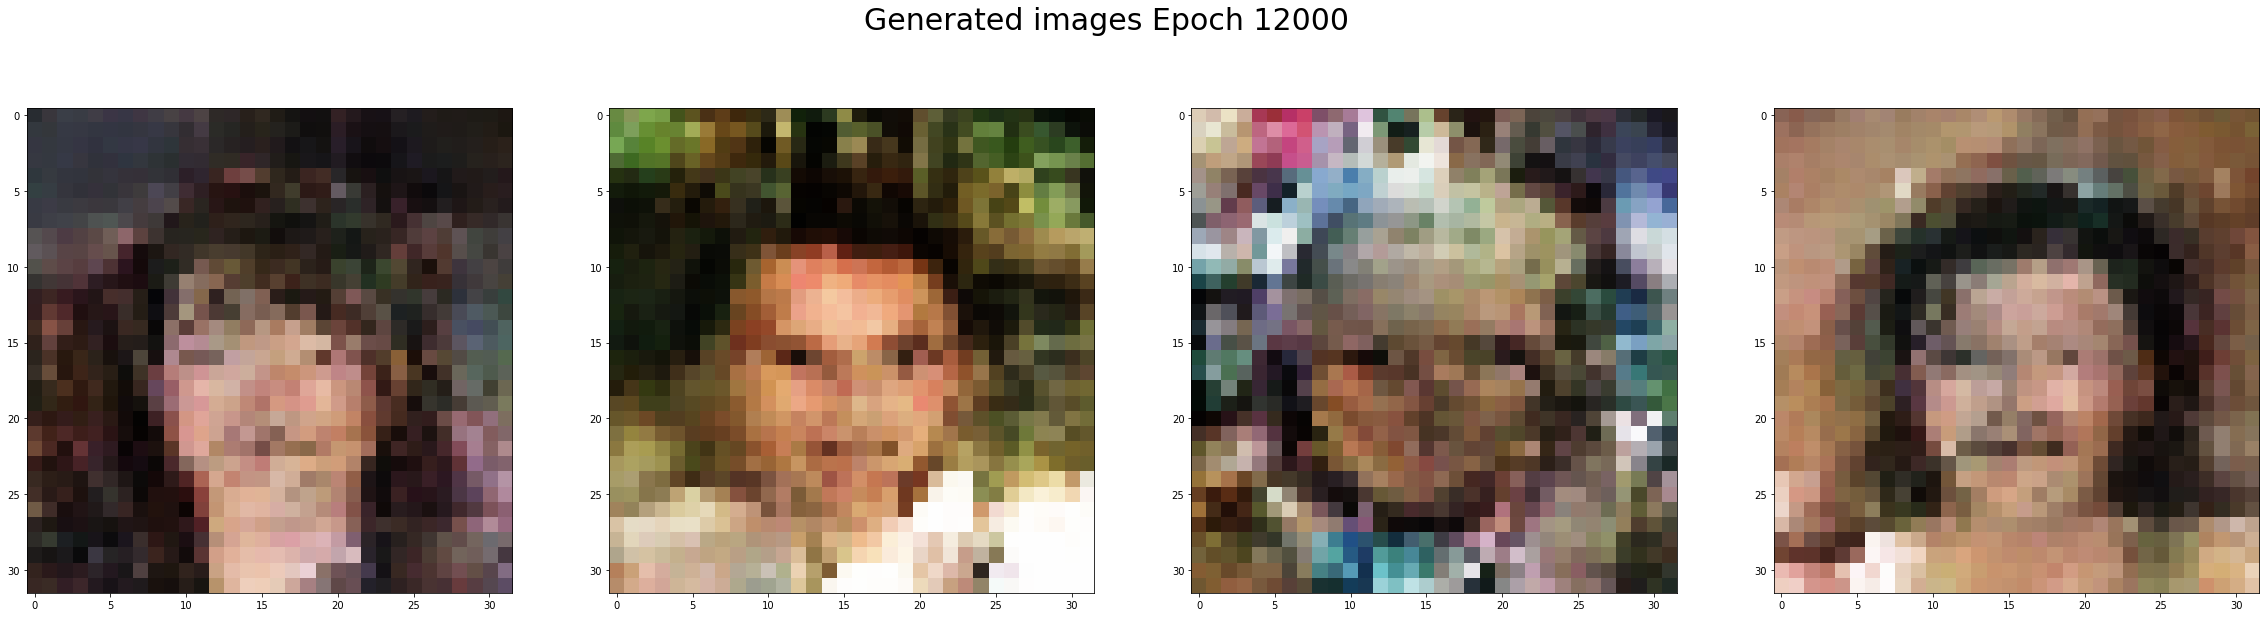

Epoch 12100 [D loss: 0.402, acc.: 083.0%] [G loss: 1.669]
Epoch 12200 [D loss: 0.403, acc.: 082.5%] [G loss: 1.582]
Epoch 12300 [D loss: 0.392, acc.: 082.6%] [G loss: 1.640]
Epoch 12400 [D loss: 0.386, acc.: 082.5%] [G loss: 1.739]
Epoch 12500 [D loss: 0.381, acc.: 083.3%] [G loss: 1.674]
Epoch 12600 [D loss: 0.398, acc.: 082.5%] [G loss: 1.698]
Epoch 12700 [D loss: 0.382, acc.: 082.5%] [G loss: 1.748]
Epoch 12800 [D loss: 0.410, acc.: 080.6%] [G loss: 1.829]
Epoch 12900 [D loss: 0.406, acc.: 081.0%] [G loss: 1.723]
Epoch 13000 [D loss: 0.420, acc.: 080.6%] [G loss: 1.669]


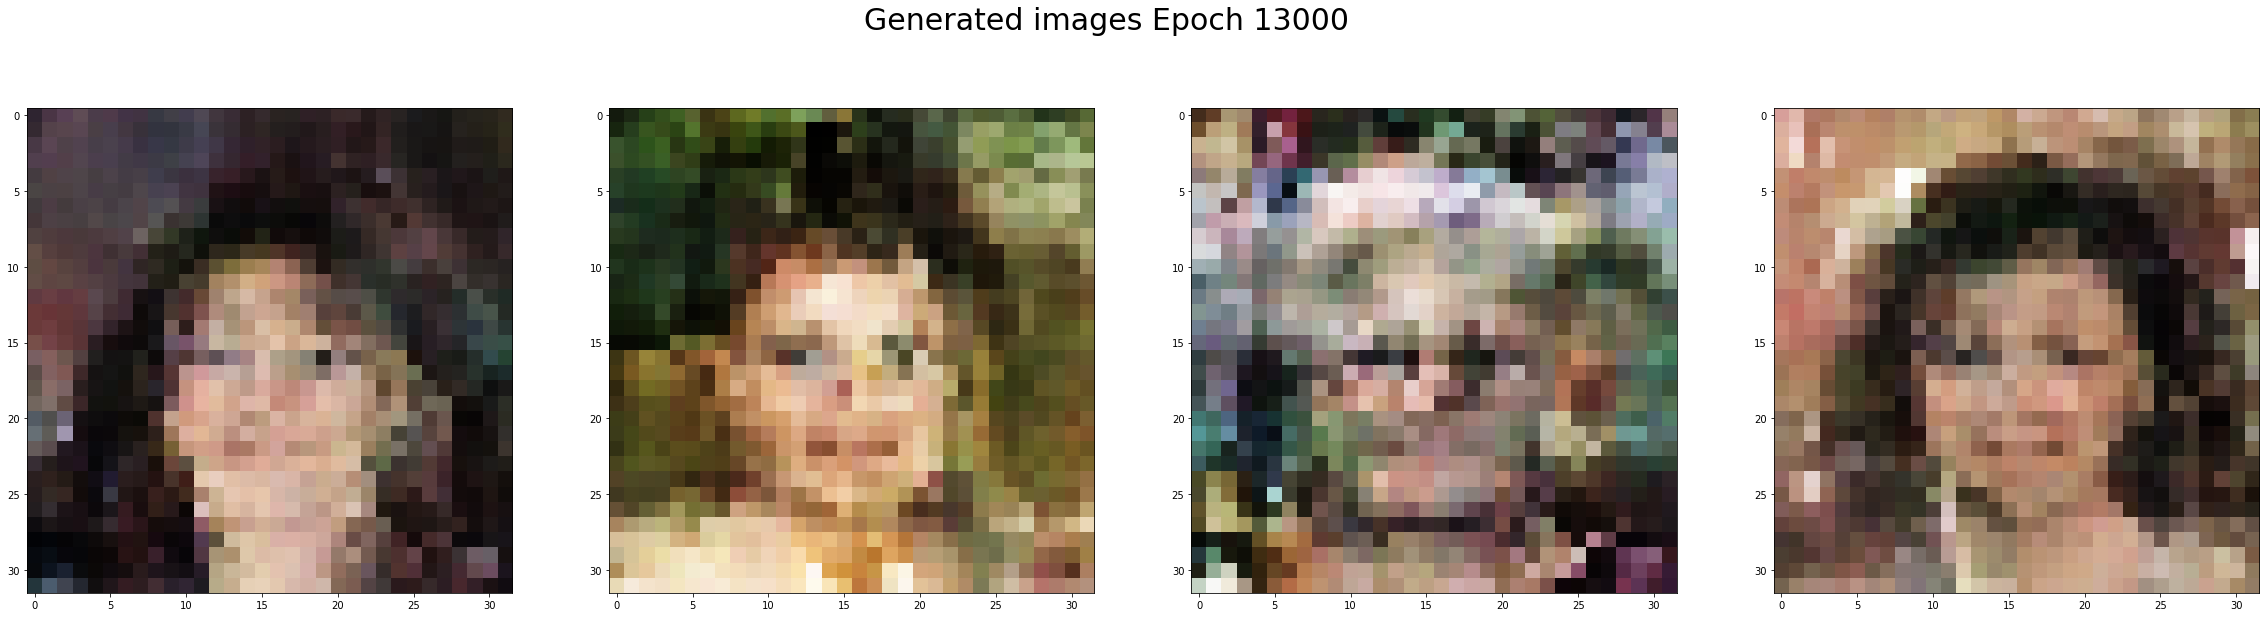

Epoch 13100 [D loss: 0.429, acc.: 079.2%] [G loss: 1.725]
Epoch 13200 [D loss: 0.433, acc.: 079.0%] [G loss: 1.603]
Epoch 13300 [D loss: 0.380, acc.: 083.6%] [G loss: 1.723]
Epoch 13400 [D loss: 0.397, acc.: 083.3%] [G loss: 1.789]
Epoch 13500 [D loss: 0.422, acc.: 079.7%] [G loss: 1.717]
Epoch 13600 [D loss: 0.347, acc.: 085.6%] [G loss: 1.747]
Epoch 13700 [D loss: 0.409, acc.: 081.1%] [G loss: 1.689]
Epoch 13800 [D loss: 0.357, acc.: 085.0%] [G loss: 1.698]
Epoch 13900 [D loss: 0.415, acc.: 079.4%] [G loss: 1.693]
Epoch 14000 [D loss: 0.376, acc.: 083.5%] [G loss: 1.796]


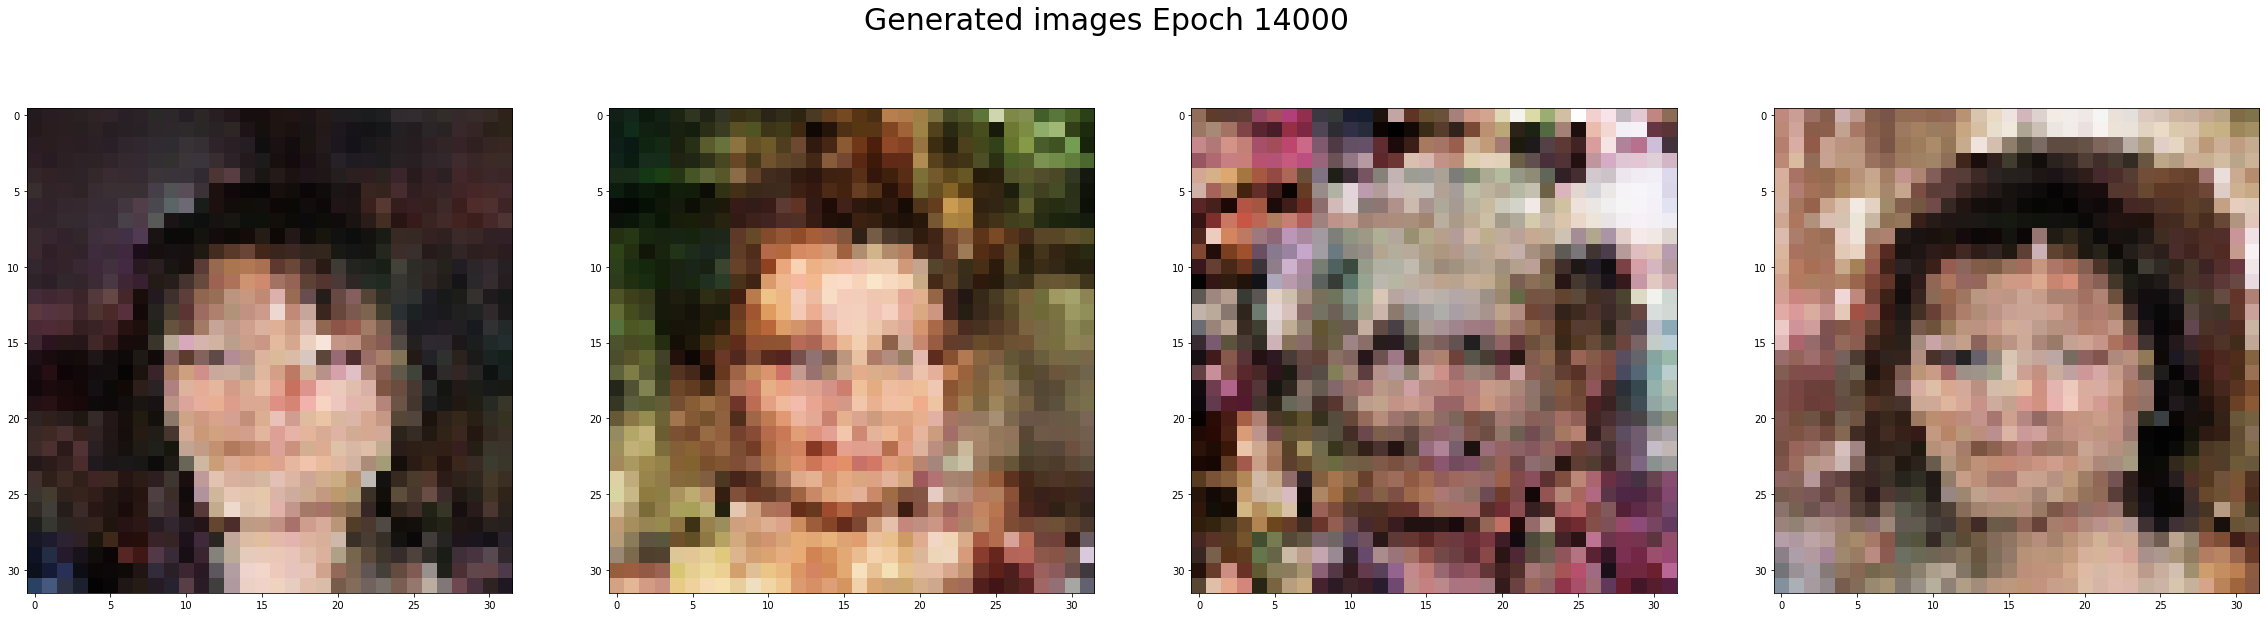

Epoch 14100 [D loss: 0.417, acc.: 080.4%] [G loss: 1.726]
Epoch 14200 [D loss: 0.427, acc.: 080.8%] [G loss: 1.717]
Epoch 14300 [D loss: 0.444, acc.: 079.4%] [G loss: 1.726]
Epoch 14400 [D loss: 0.398, acc.: 082.2%] [G loss: 1.842]
Epoch 14500 [D loss: 0.365, acc.: 083.1%] [G loss: 1.772]
Epoch 14600 [D loss: 0.396, acc.: 082.3%] [G loss: 1.727]
Epoch 14700 [D loss: 0.388, acc.: 081.6%] [G loss: 1.709]
Epoch 14800 [D loss: 0.405, acc.: 081.1%] [G loss: 1.760]
Epoch 14900 [D loss: 0.347, acc.: 084.9%] [G loss: 1.862]
Epoch 15000 [D loss: 0.394, acc.: 082.4%] [G loss: 1.744]


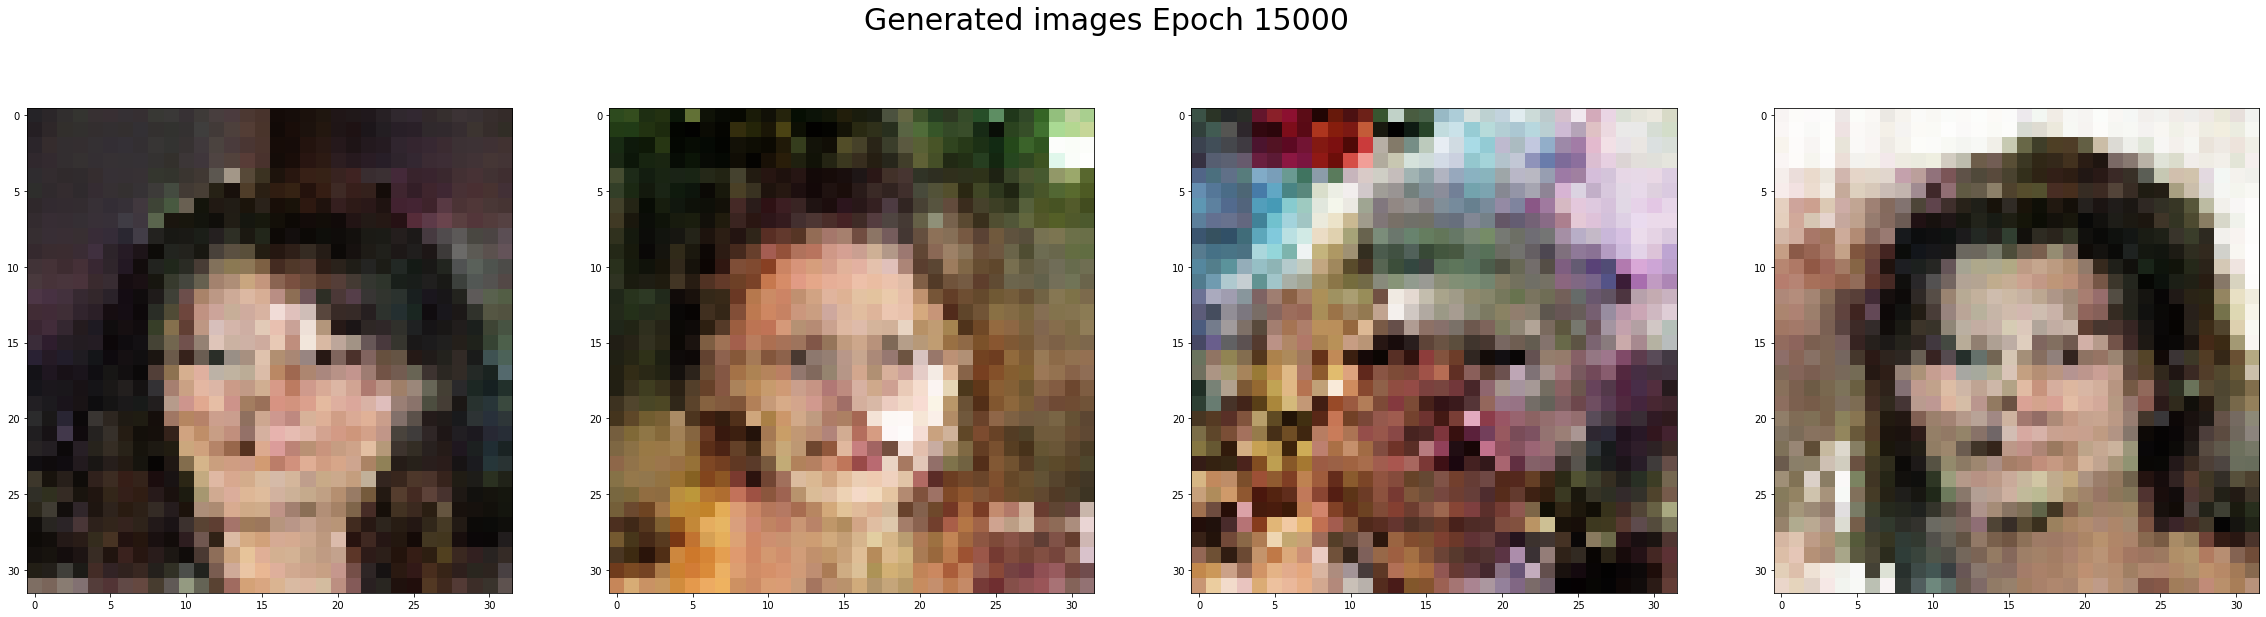

Epoch 15100 [D loss: 0.346, acc.: 085.0%] [G loss: 1.829]
Epoch 15200 [D loss: 0.359, acc.: 084.3%] [G loss: 1.751]
Epoch 15300 [D loss: 0.390, acc.: 082.8%] [G loss: 1.849]
Epoch 15400 [D loss: 0.395, acc.: 081.8%] [G loss: 1.858]
Epoch 15500 [D loss: 0.371, acc.: 083.2%] [G loss: 1.801]
Epoch 15600 [D loss: 0.364, acc.: 083.9%] [G loss: 1.801]
Epoch 15700 [D loss: 0.413, acc.: 079.7%] [G loss: 1.753]
Epoch 15800 [D loss: 0.373, acc.: 083.3%] [G loss: 1.817]
Epoch 15900 [D loss: 0.355, acc.: 085.0%] [G loss: 1.844]
Epoch 16000 [D loss: 0.385, acc.: 083.3%] [G loss: 1.781]


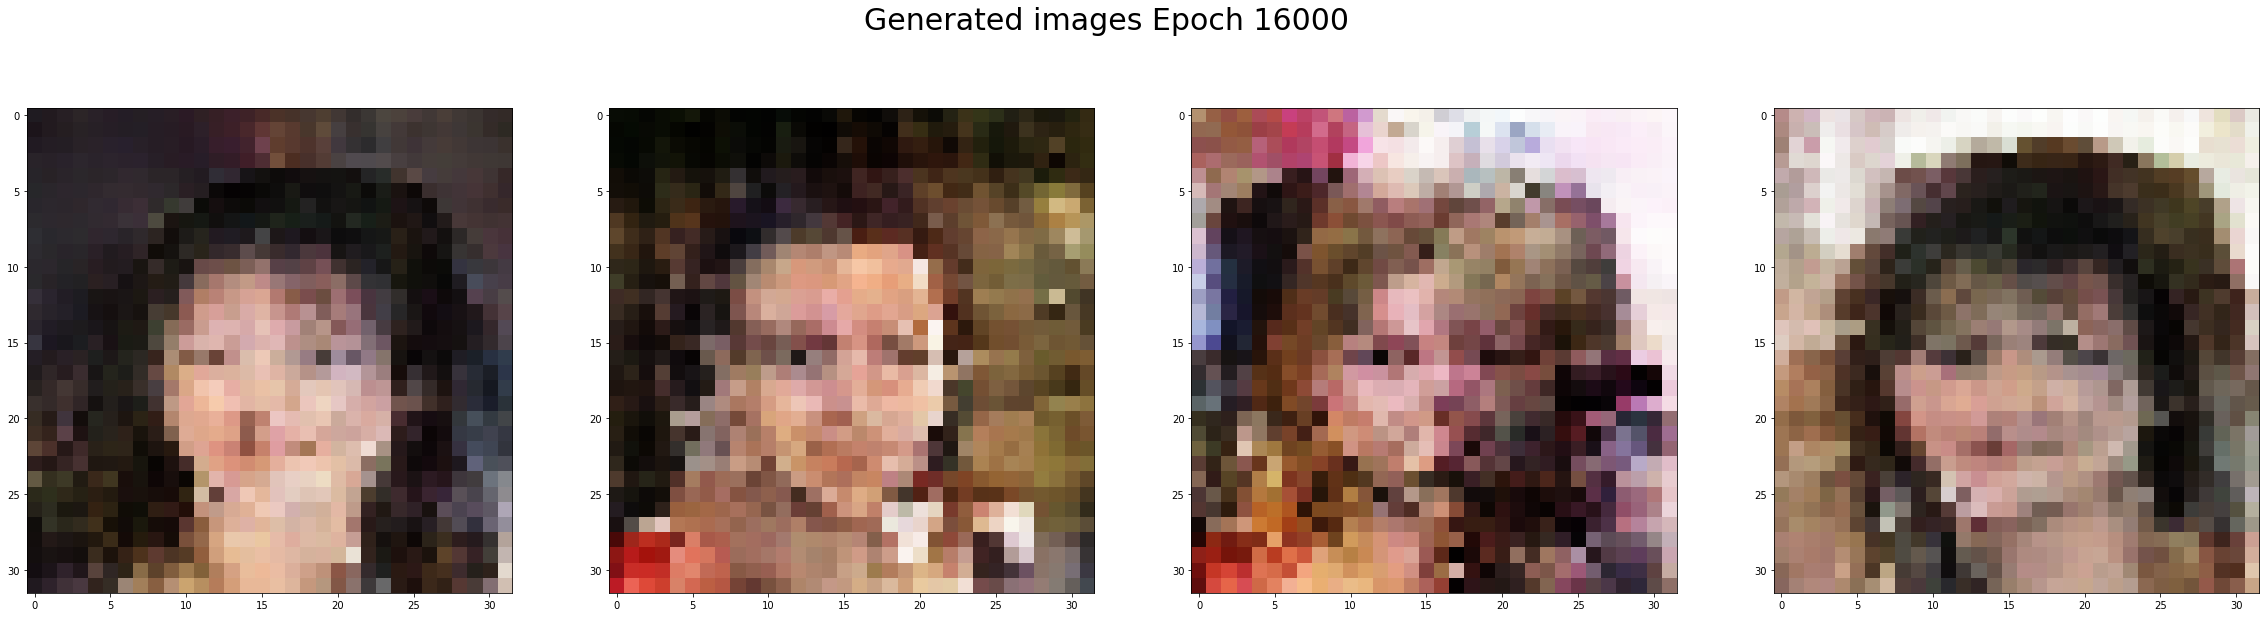

Epoch 16100 [D loss: 0.391, acc.: 082.2%] [G loss: 1.823]
Epoch 16200 [D loss: 0.369, acc.: 083.4%] [G loss: 1.837]
Epoch 16300 [D loss: 0.360, acc.: 084.3%] [G loss: 1.884]
Epoch 16400 [D loss: 0.372, acc.: 084.1%] [G loss: 1.778]
Epoch 16500 [D loss: 0.342, acc.: 085.3%] [G loss: 1.832]
Epoch 16600 [D loss: 0.363, acc.: 083.9%] [G loss: 1.879]
Epoch 16700 [D loss: 0.383, acc.: 082.2%] [G loss: 1.842]
Epoch 16800 [D loss: 0.325, acc.: 087.4%] [G loss: 1.927]
Epoch 16900 [D loss: 0.527, acc.: 075.7%] [G loss: 1.677]
Epoch 17000 [D loss: 0.372, acc.: 082.9%] [G loss: 1.771]


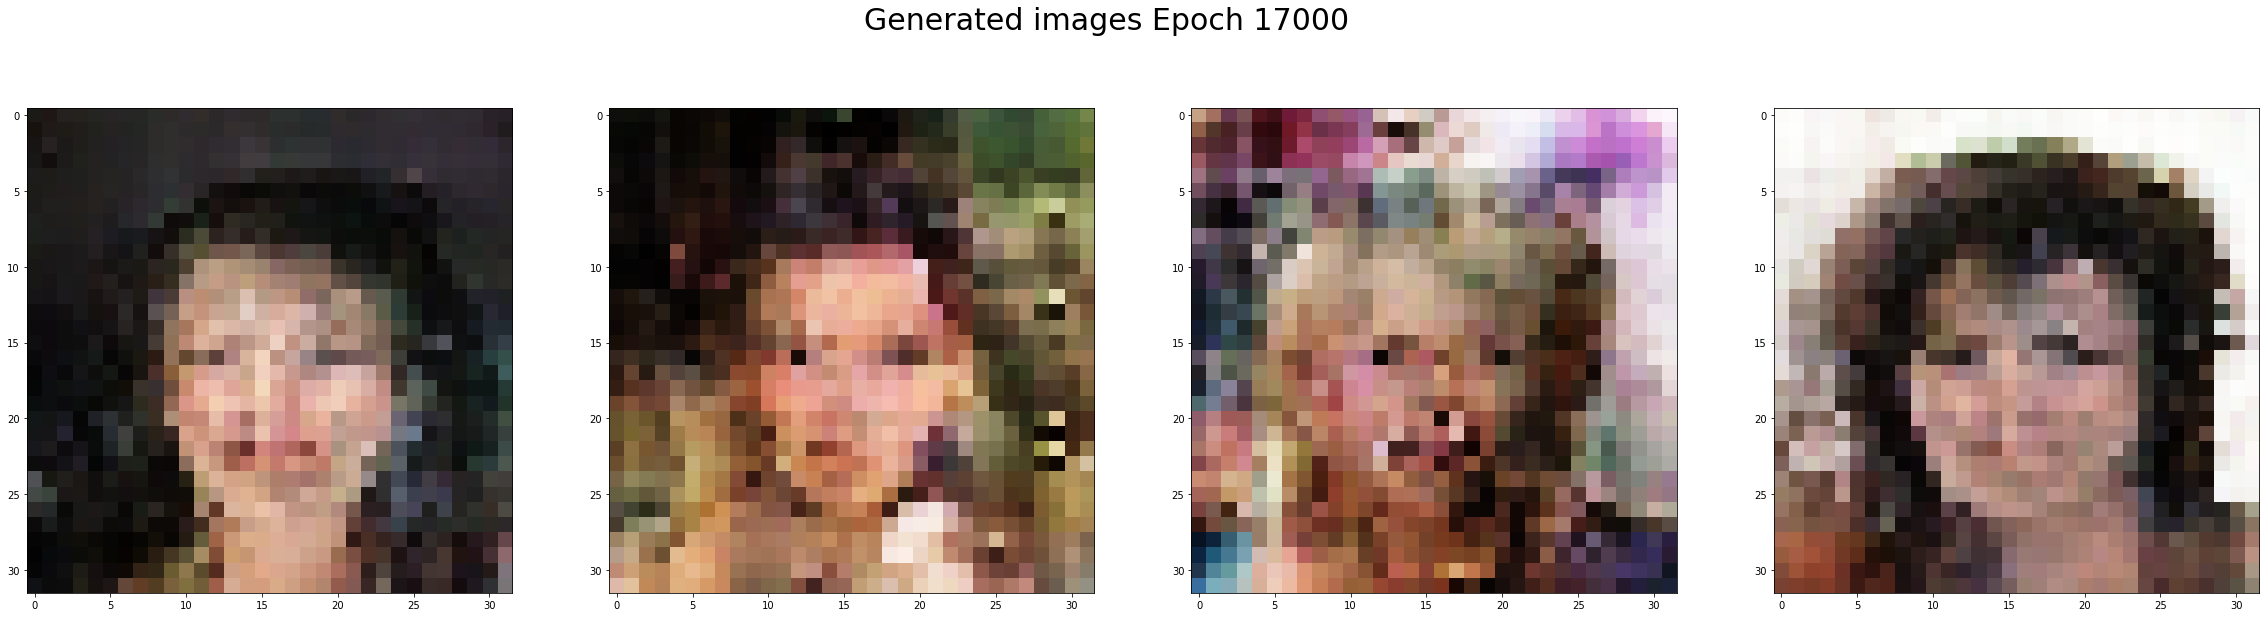

Epoch 17100 [D loss: 0.404, acc.: 082.7%] [G loss: 1.798]
Epoch 17200 [D loss: 0.378, acc.: 083.9%] [G loss: 1.869]
Epoch 17300 [D loss: 0.362, acc.: 083.4%] [G loss: 1.922]
Epoch 17400 [D loss: 0.308, acc.: 087.4%] [G loss: 1.934]
Epoch 17500 [D loss: 0.348, acc.: 084.1%] [G loss: 1.884]
Epoch 17600 [D loss: 0.376, acc.: 083.5%] [G loss: 1.898]
Epoch 17700 [D loss: 0.328, acc.: 086.0%] [G loss: 1.847]
Epoch 17800 [D loss: 0.339, acc.: 086.0%] [G loss: 1.859]
Epoch 17900 [D loss: 0.338, acc.: 085.9%] [G loss: 1.867]
Epoch 18000 [D loss: 0.379, acc.: 083.0%] [G loss: 1.869]


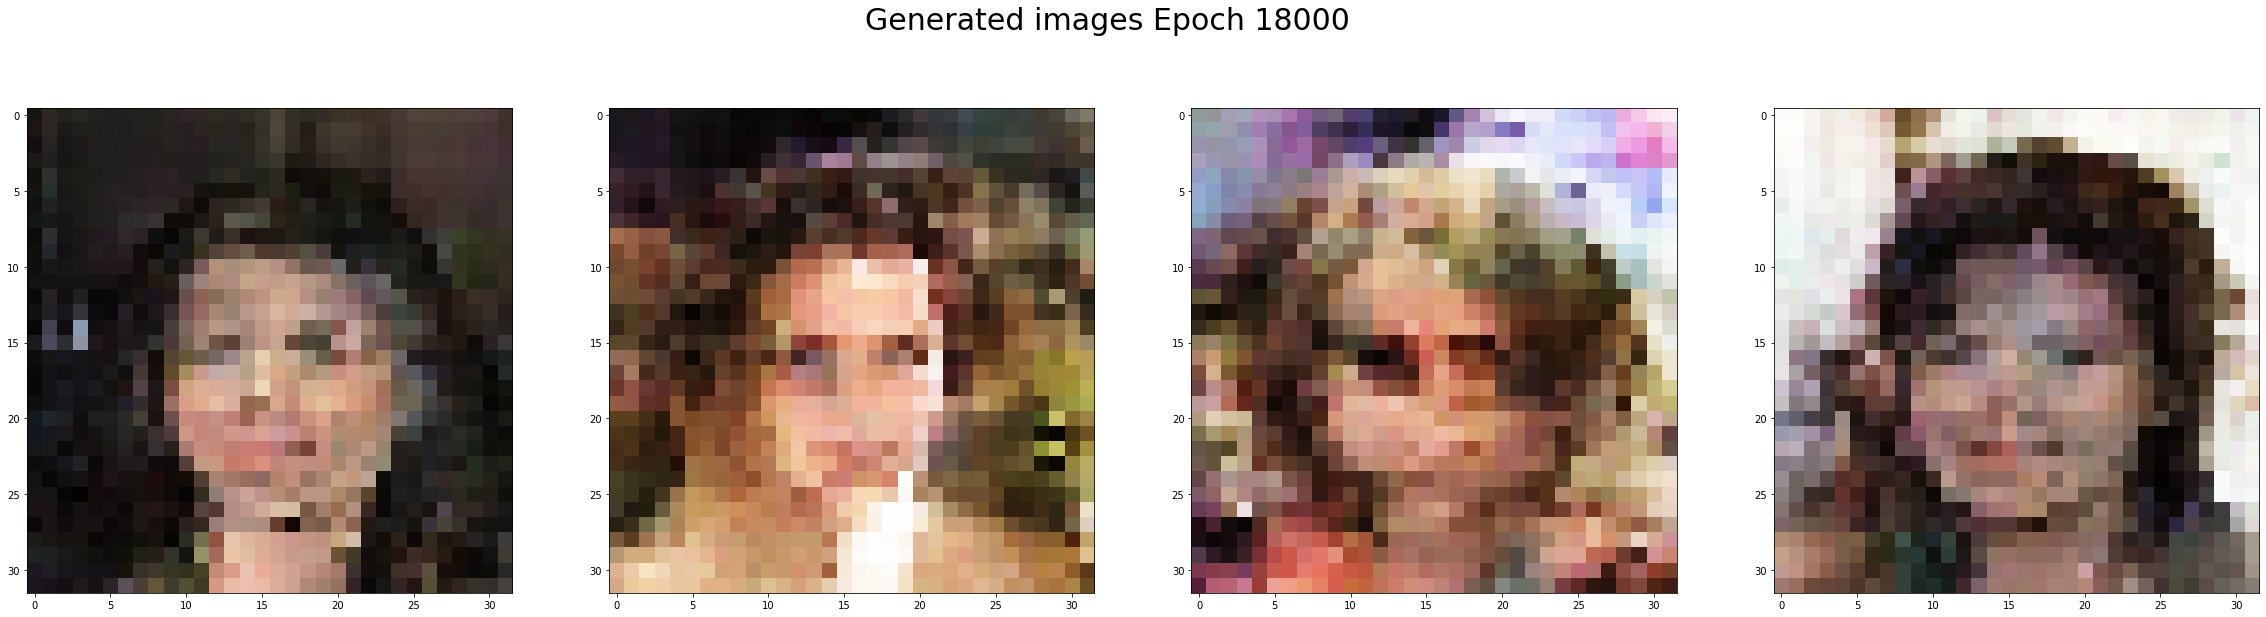

Epoch 18100 [D loss: 0.323, acc.: 085.8%] [G loss: 1.921]
Epoch 18200 [D loss: 0.308, acc.: 087.4%] [G loss: 1.916]
Epoch 18300 [D loss: 0.414, acc.: 081.2%] [G loss: 1.944]
Epoch 18400 [D loss: 0.365, acc.: 084.4%] [G loss: 1.853]
Epoch 18500 [D loss: 0.343, acc.: 085.4%] [G loss: 1.880]
Epoch 18600 [D loss: 0.370, acc.: 083.8%] [G loss: 1.873]
Epoch 18700 [D loss: 0.339, acc.: 085.3%] [G loss: 1.991]
Epoch 18800 [D loss: 0.316, acc.: 087.4%] [G loss: 1.914]
Epoch 18900 [D loss: 0.379, acc.: 083.4%] [G loss: 1.932]
Epoch 19000 [D loss: 0.340, acc.: 085.3%] [G loss: 1.907]


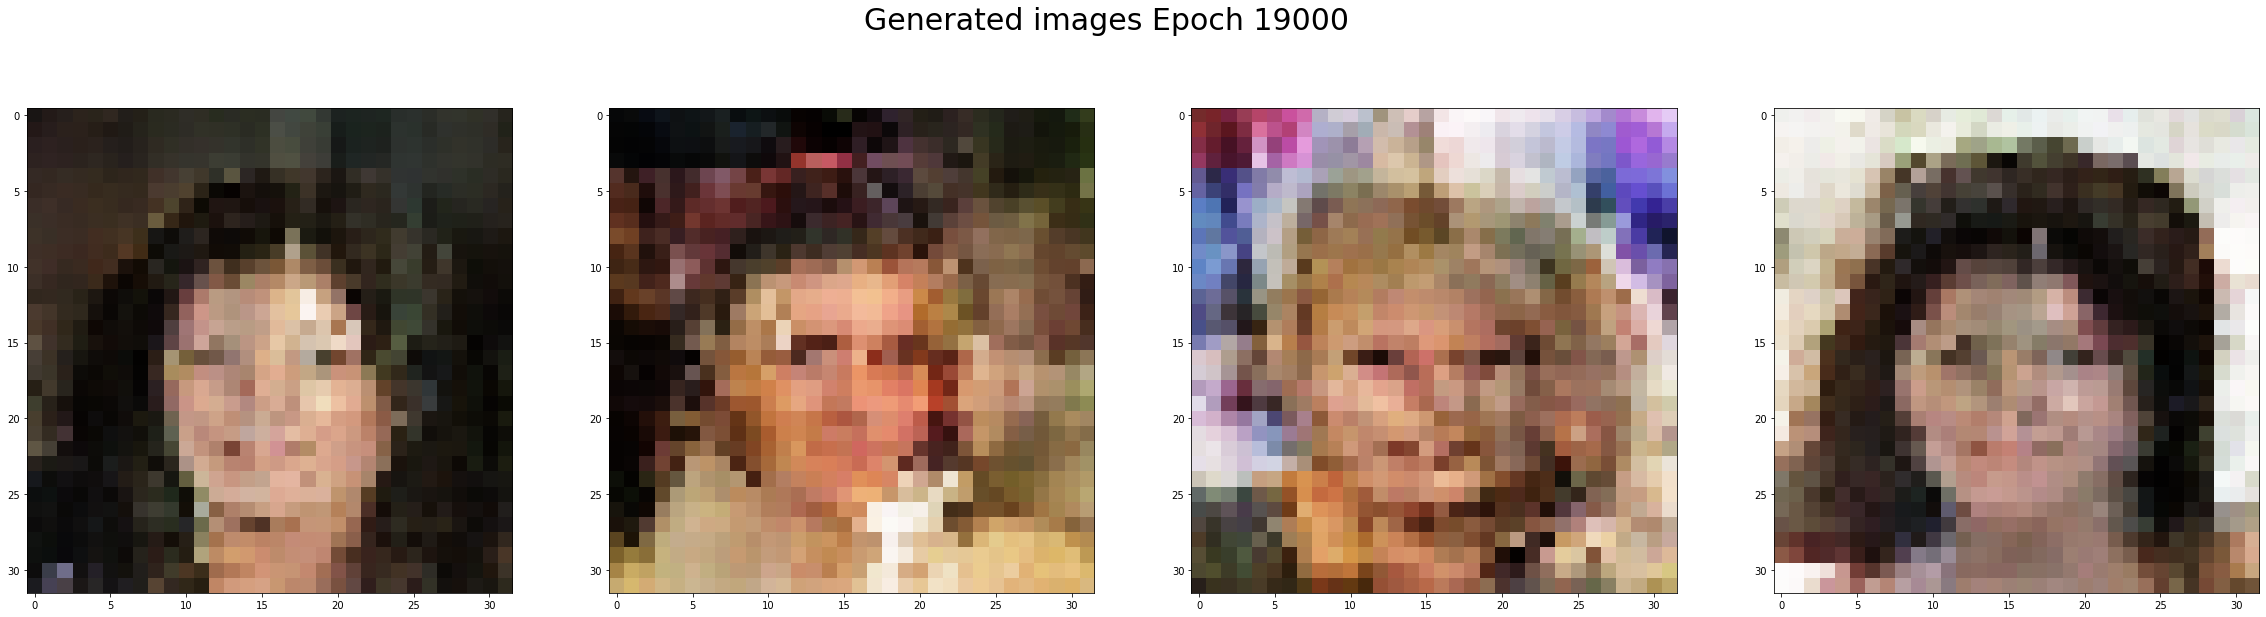

Epoch 19100 [D loss: 0.338, acc.: 085.3%] [G loss: 1.964]
Epoch 19200 [D loss: 0.354, acc.: 084.2%] [G loss: 1.945]


In [0]:
import numpy as np
import time
from keras import layers, models
from keras.optimizers import Adam
img_shape     = (32, 32, 3)
## optimizer
#optimizer = Adam(0.0002, 0.5)
optimizer = Adam(0.00007, 0.5)

def build_generator(img_shape, noise_shape = (100,)):
    '''
    noise_shape : the dimension of the input vector for the generator
    img_shape   : the dimension of the output
    '''
    ## latent variable as input
    input_noise = layers.Input(shape=noise_shape) 
    d = layers.Dense(1024, activation="relu")(input_noise) 
    d = layers.Dense(1024, activation="relu")(input_noise) 
    d = layers.Dense(128*8*8, activation="relu")(d)
    d = layers.Reshape((8,8,128))(d)
    
    d = layers.Conv2DTranspose(128, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
    d = layers.Conv2D( 64  , ( 1 , 1 ) , activation='relu' , padding='same', name="block_4")(d) ## 16,16


    d = layers.Conv2DTranspose(32, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
    d = layers.Conv2D( 64  , ( 1 , 1 ) , activation='relu' , padding='same', name="block_5")(d) ## 32,32
    
    if img_shape[0] == 64:
        d = layers.Conv2DTranspose(32, kernel_size=(2,2) ,  strides=(2,2) , use_bias=False)(d)
        d = layers.Conv2D( 64  , ( 1 , 1 ) , activation='relu' , padding='same', name="block_6")(d) ## 64,64
    
    img = layers.Conv2D( 3 , ( 1 , 1 ) , activation='sigmoid' , padding='same', name="final_block")(d) ## 32, 32
    model = models.Model(input_noise, img)
    model.summary() 
    return(model)

## Set the dimension of latent variables to be 100
noise_shape = (100,)

generator = build_generator(img_shape, noise_shape = noise_shape)

generator.compile(loss='binary_crossentropy', optimizer=optimizer)
def get_noise(nsample=1, nlatent_dim=100):
    noise = np.random.normal(0, 1, (nsample,nlatent_dim))
    return(noise)

def plot_generated_images(noise,path_save=None,titleadd=""):
    imgs = generator.predict(noise)
    fig = plt.figure(figsize=(40,10))
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(1,nsample,i+1)
        ax.imshow(img)
    fig.suptitle("Generated images "+titleadd,fontsize=30)
    
    if path_save is not None:
        plt.savefig(path_save,
                    bbox_inches='tight',
                    pad_inches=0)
        plt.close()
    else:
        plt.show()

nsample = 4
noise = get_noise(nsample=nsample, nlatent_dim=noise_shape[0])
def build_discriminator(img_shape,noutput=1):
    input_img = layers.Input(shape=img_shape)
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_img)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(1, 1), name='block4_pool')(x)

    
    x         = layers.Flatten()(x)
    x         = layers.Dense(1024,      activation="relu")(x)
    out       = layers.Dense(noutput,   activation='sigmoid')(x)
    model     = models.Model(input_img, out)
    
    return model

discriminator  = build_discriminator(img_shape)
discriminator.compile(loss      = 'binary_crossentropy', 
                      optimizer = optimizer,
                      metrics   = ['accuracy'])

discriminator.summary()


z = layers.Input(shape=noise_shape)
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The valid takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity 
combined = models.Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)
combined.summary()

def train(models, X_train, noise_plot, dir_result="/result/", epochs=10000, batch_size=128):
        '''
        models     : tuple containins three tensors, (combined, discriminator, generator)
        X_train    : np.array containing images (Nsample, height, width, Nchannels)
        noise_plot : np.array of size (Nrandom_sample_to_plot, hidden unit length)
        dir_result : the location where the generated plots for noise_plot are saved 
        
        '''
        combined, discriminator, generator = models
        nlatent_dim = noise_plot.shape[1]
        half_batch  = int(batch_size / 2)
        history = []
        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]
            noise = get_noise(half_batch, nlatent_dim)

            # Generate a half batch of new images
            gen_imgs = generator.predict(noise)

            
            # Train the discriminator q: better to mix them together?
            d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            # ---------------------
            #  Train Generator
            # ---------------------

            noise = get_noise(batch_size, nlatent_dim)

            # The generator wants the discriminator to label the generated samples
            # as valid (ones)
            valid_y = (np.array([1] * batch_size)).reshape(batch_size,1)
            
            # Train the generator
            g_loss = combined.train_on_batch(noise, valid_y)

            history.append({"D":d_loss[0],"G":g_loss})
            
            if epoch % 100 == 0:
                # Plot the progress
                print ("Epoch {:05.0f} [D loss: {:4.3f}, acc.: {:05.1f}%] [G loss: {:4.3f}]".format(
                    epoch, d_loss[0], 100*d_loss[1], g_loss))
            if epoch % int(epochs/100) == 0:
                plot_generated_images(noise_plot,
                                      path_save=dir_result+"/image_{:05.0f}.png".format(epoch),
                                      titleadd="Epoch {}".format(epoch))
            if epoch % 1000 == 0:
                plot_generated_images(noise_plot,
                                      titleadd="Epoch {}".format(epoch))
                        
        return(history)

dir_result="./result_GAN/"

try:
    os.mkdir(dir_result)
except:
    pass
    
start_time = time.time()

_models = combined, discriminator, generator          

history = train(_models, X_train, noise, dir_result=dir_result,epochs=20000, batch_size=128*8)
end_time = time.time()
print("-"*10)
print("Time took: {:4.2f} min".format((end_time - start_time)/60))
